In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2

/seismic/models/brendan/*.pth
Loading:  /seismic/models/brendan/unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data()
d = data[11]
print(d.family)

CurveFault_A


In [3]:
# importlib.reload(seis_prior)
# importlib.reload(seis_diagnostics)
# importlib.reload(seis_invert)
# kgs.profiling=False
# kgs.debugging_mode = 0
# seis_forward2.profiling=False
# seis_forward2.reset_profile()

# model = seis_invert.InversionModel()
# model.state = 1
# model.method = 'L-BFGS-B'
# model.maxiter = 5000
# model.prior = seis_prior.SquaredExponential()


# model.prior.basis_functions();
# w = cp.linalg.eigvalsh(model.prior.P)   
# plt.figure()
# plt.semilogy(cp.asnumpy(cp.abs(w)))

capturing graph


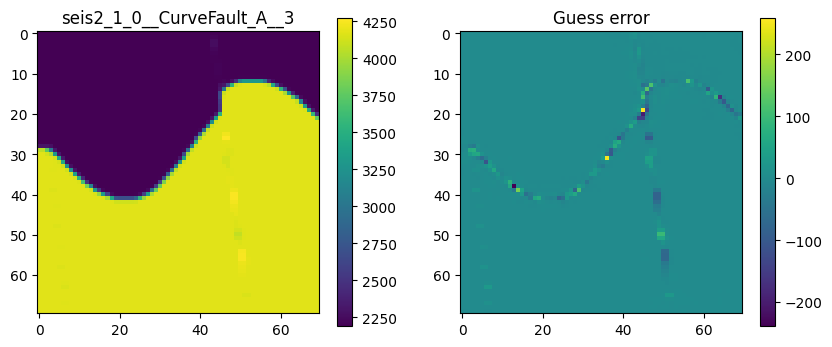

diag 2.1505153071545827e-05
capturing graph
diag 2.1505153071545827e-05


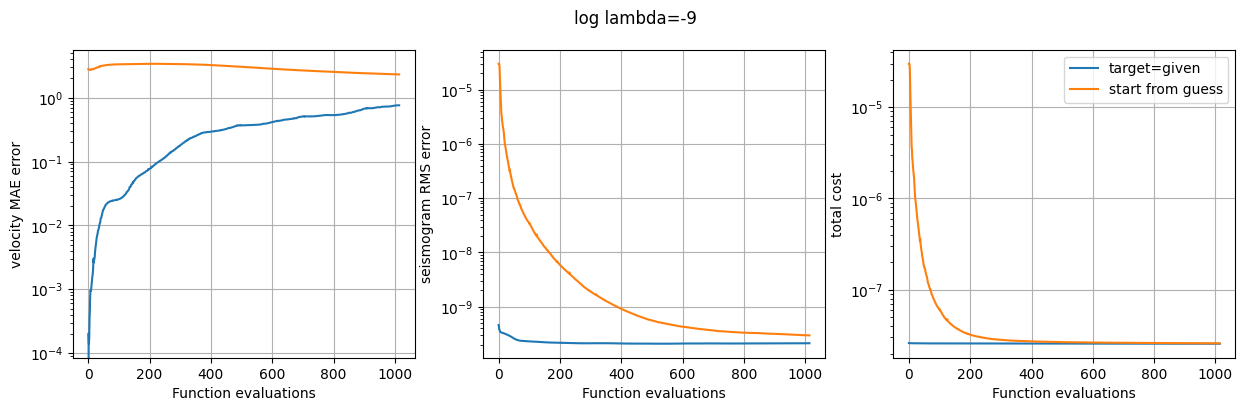

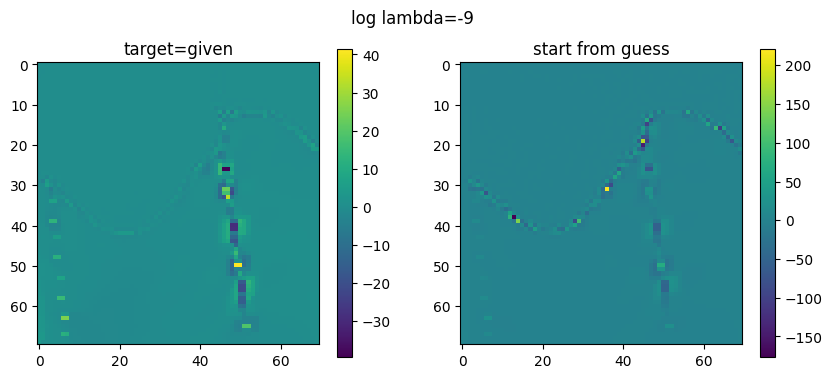

diag 2.1505153071545827e-05
diag 2.1505153071545827e-05


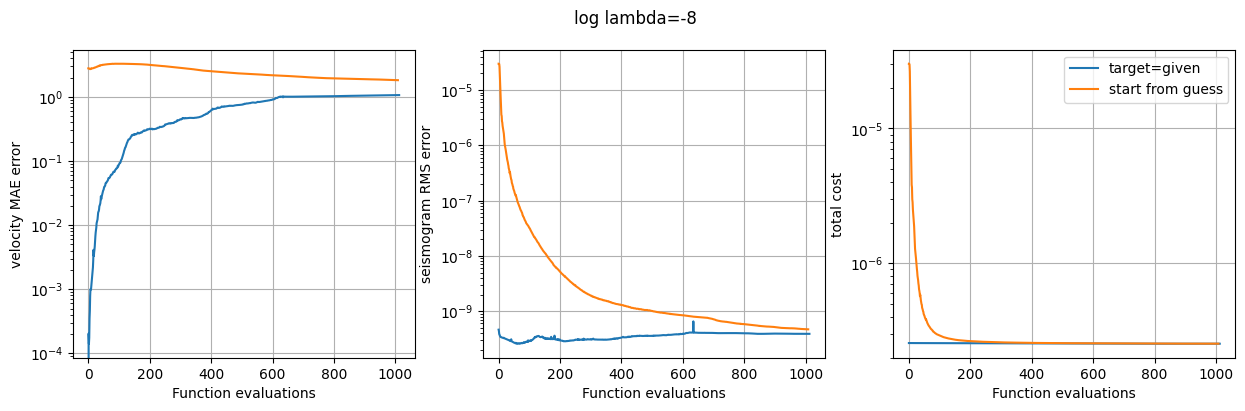

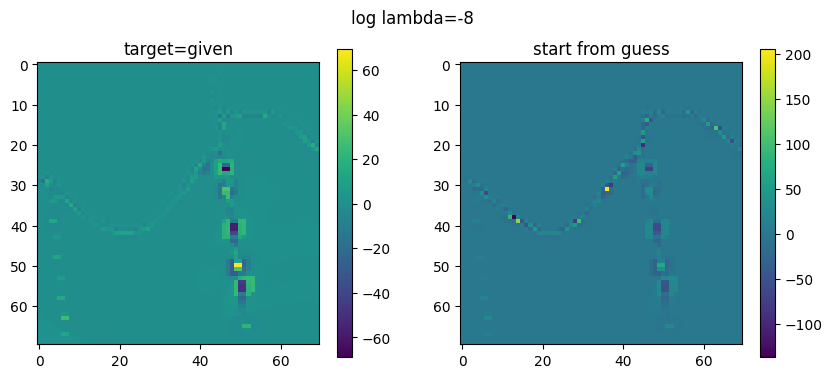

diag 2.1505153071545827e-05
diag 2.1505153071545827e-05


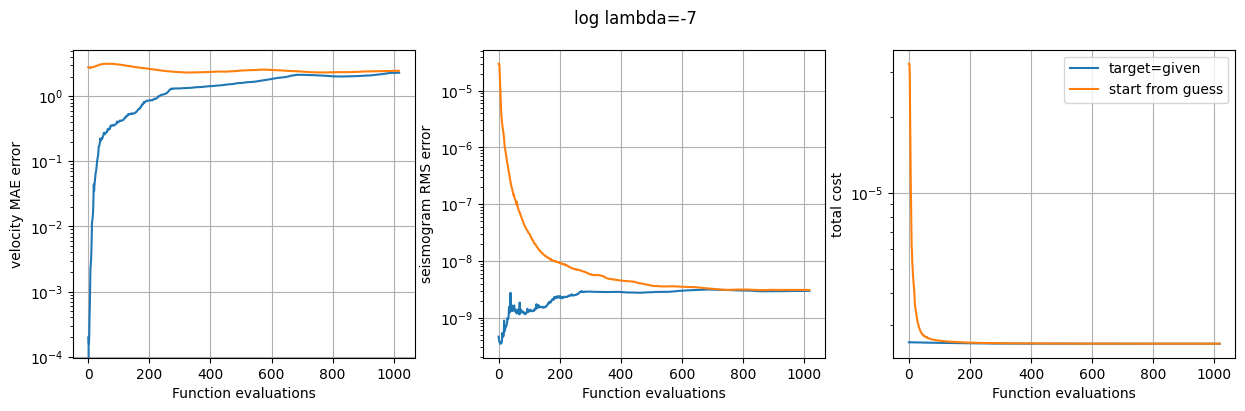

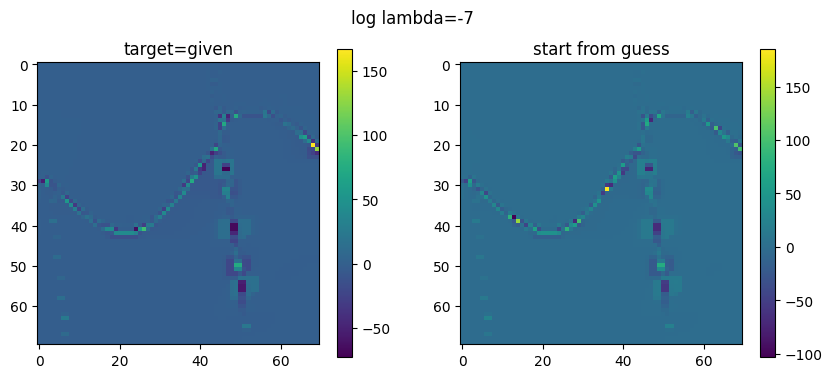

100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


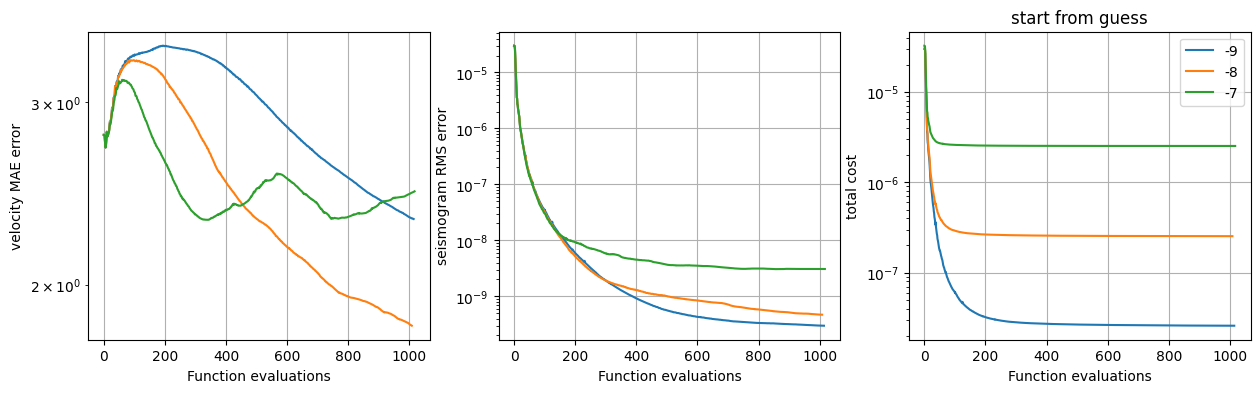

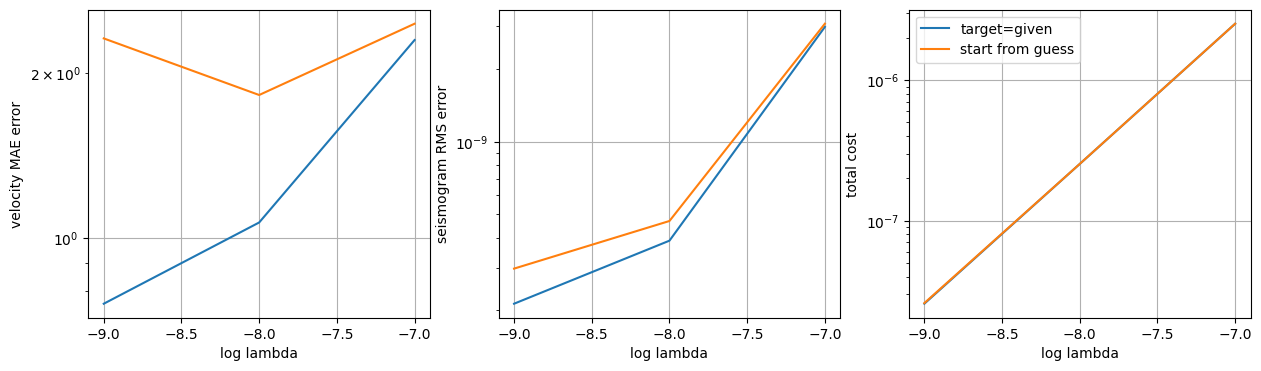

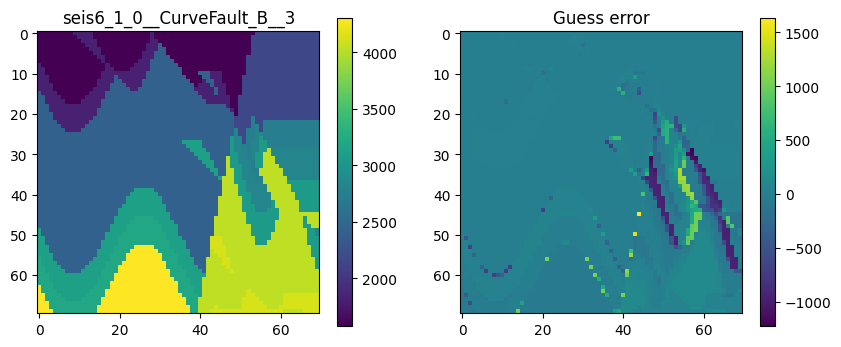

diag 3.229498101261271e-05
diag 3.229498101261271e-05


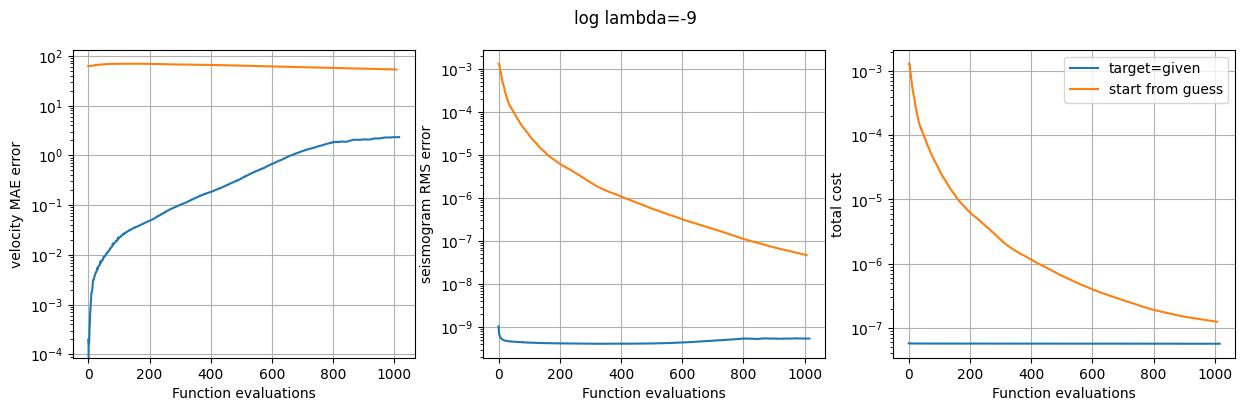

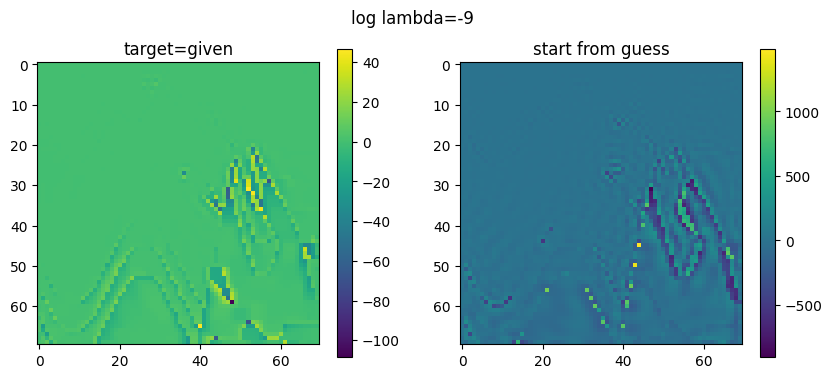

diag 3.229498101261271e-05
diag 3.229498101261271e-05


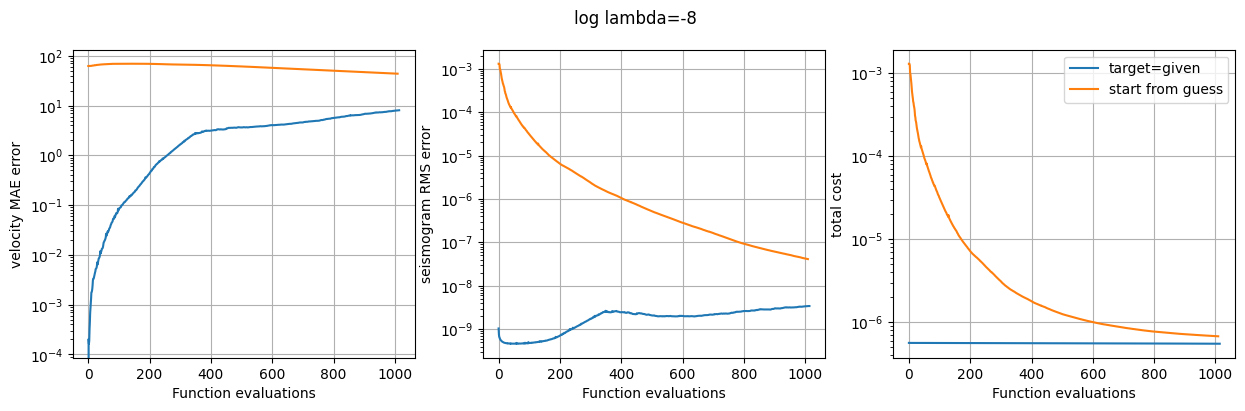

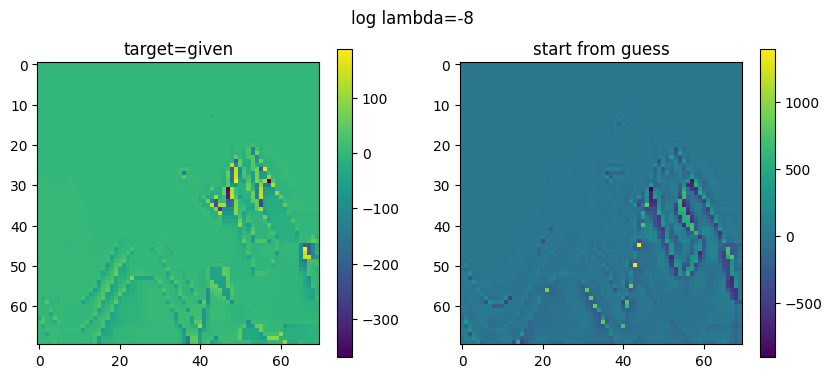

diag 3.229498101261271e-05
diag 3.229498101261271e-05


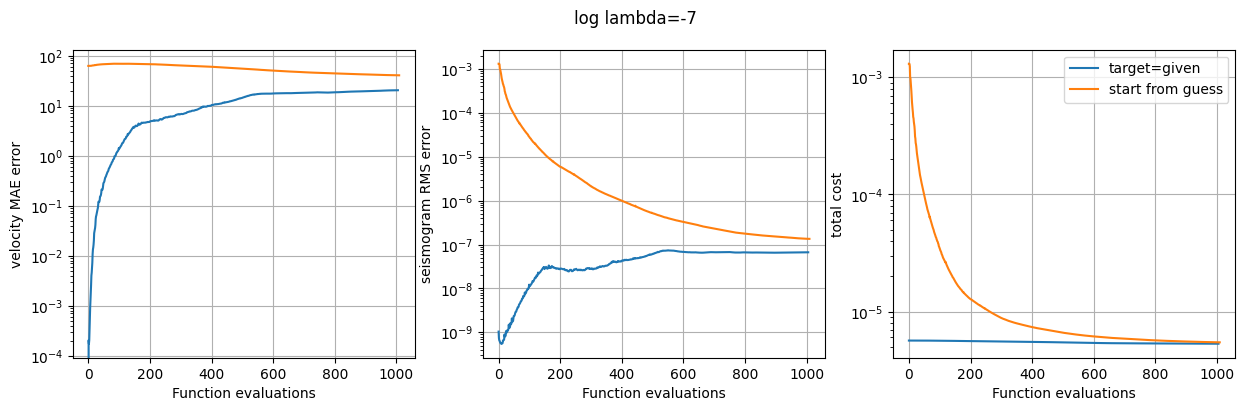

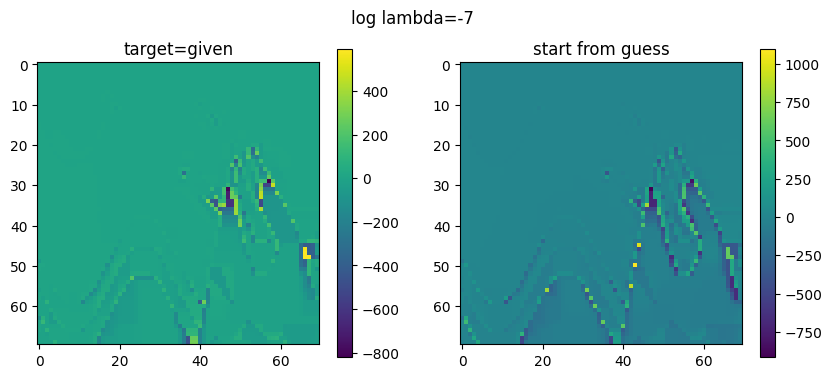

100%|██████████| 1/1 [00:00<00:00, 10.41it/s]


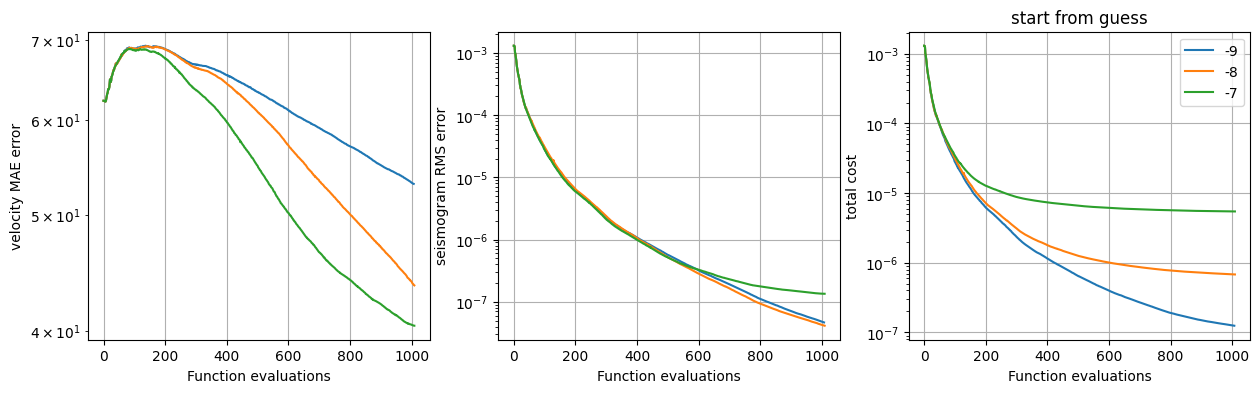

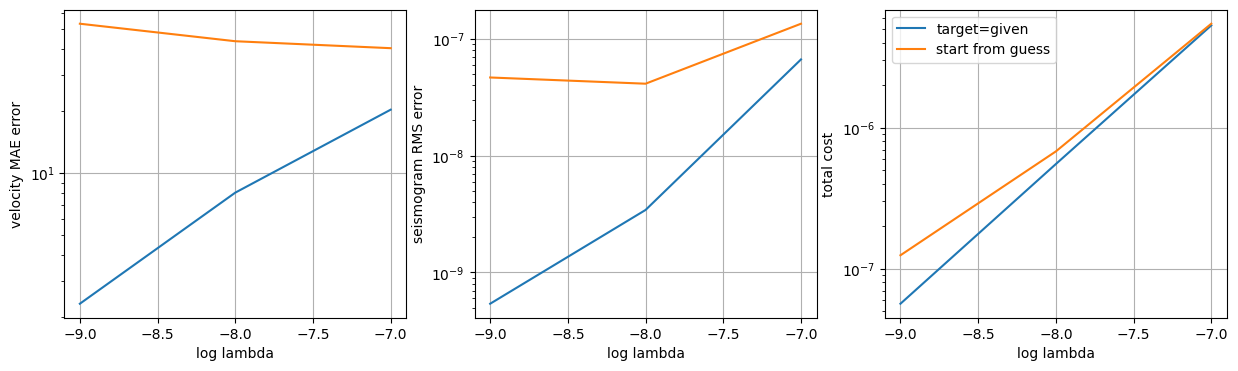

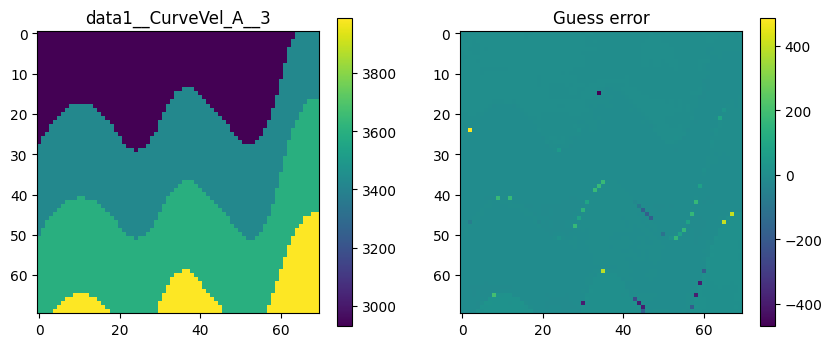

diag 4.248734974147108e-05
diag 4.248734974147108e-05


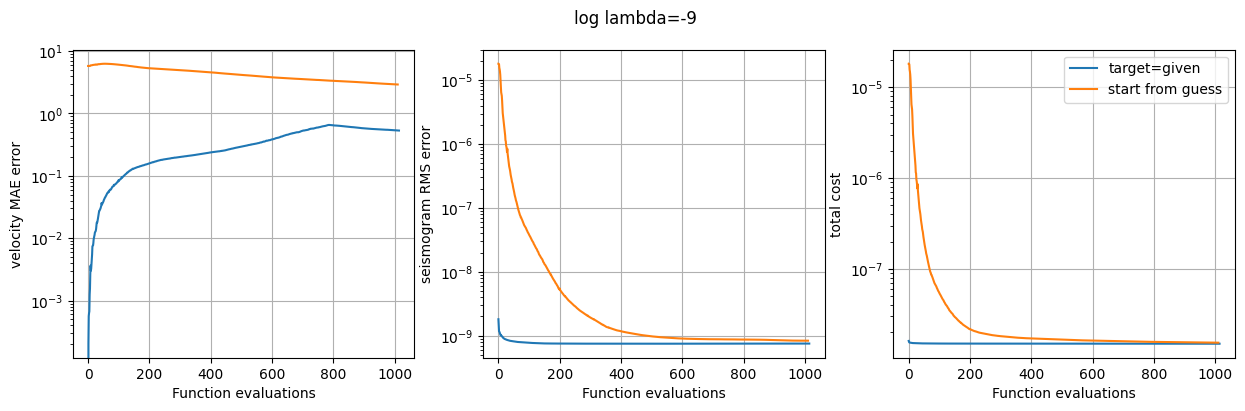

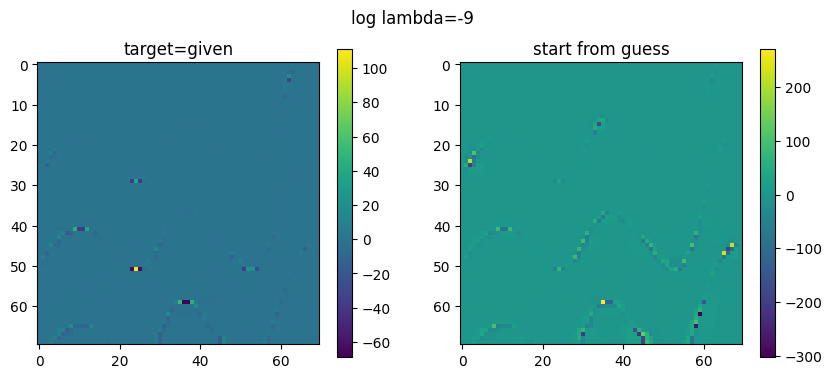

diag 4.248734974147108e-05
diag 4.248734974147108e-05


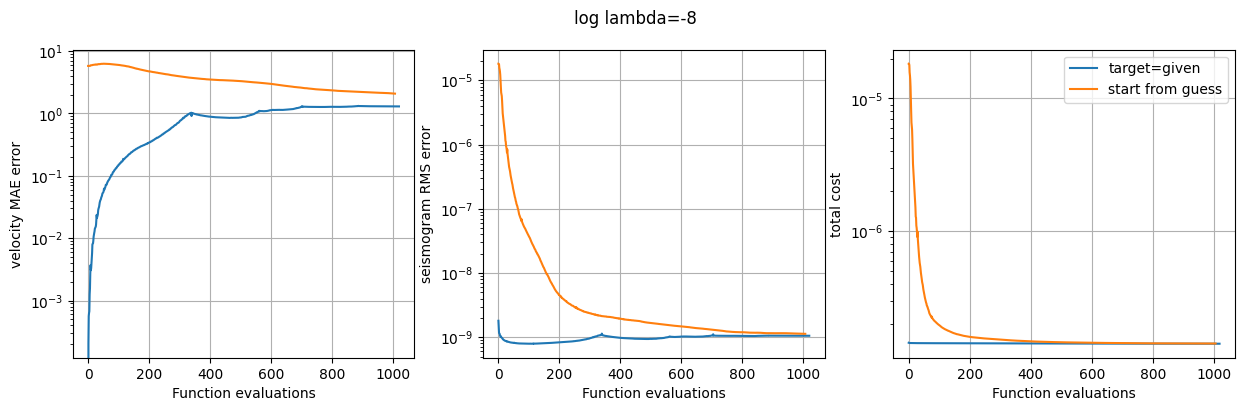

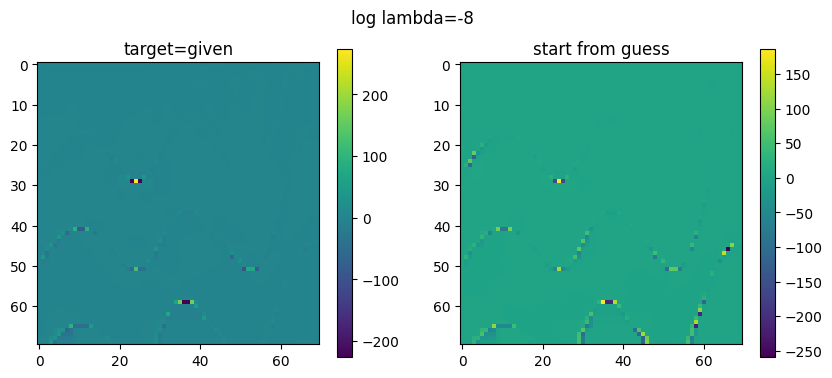

diag 4.248734974147108e-05
diag 4.248734974147108e-05


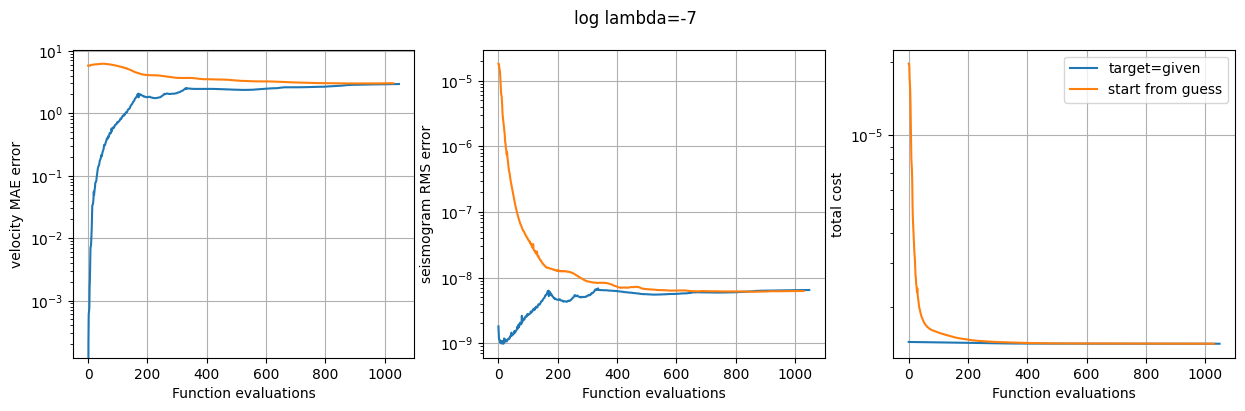

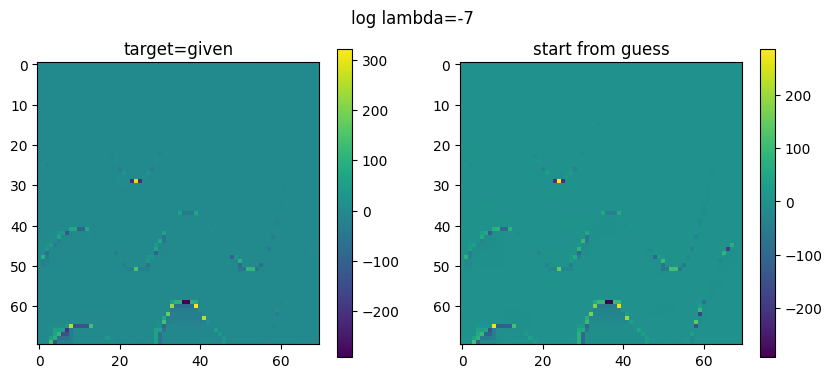

100%|██████████| 1/1 [00:00<00:00, 10.28it/s]


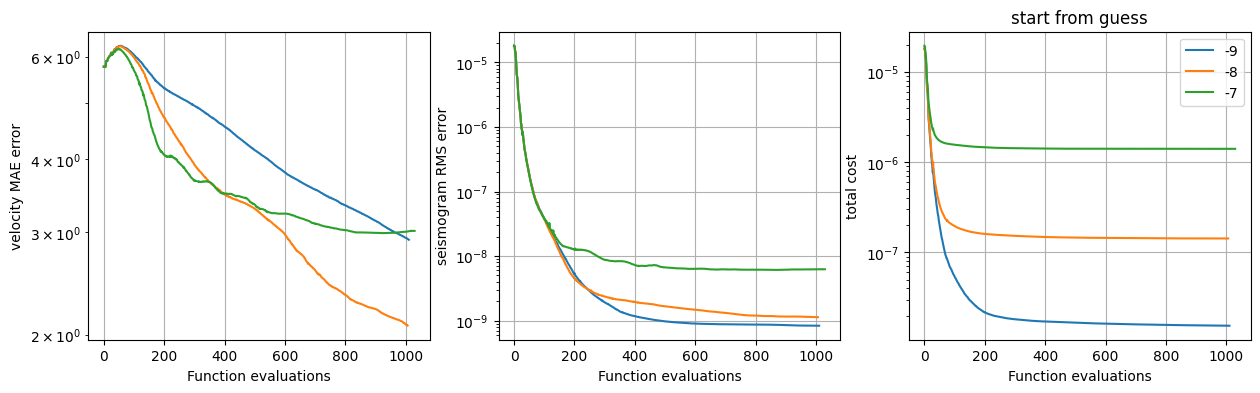

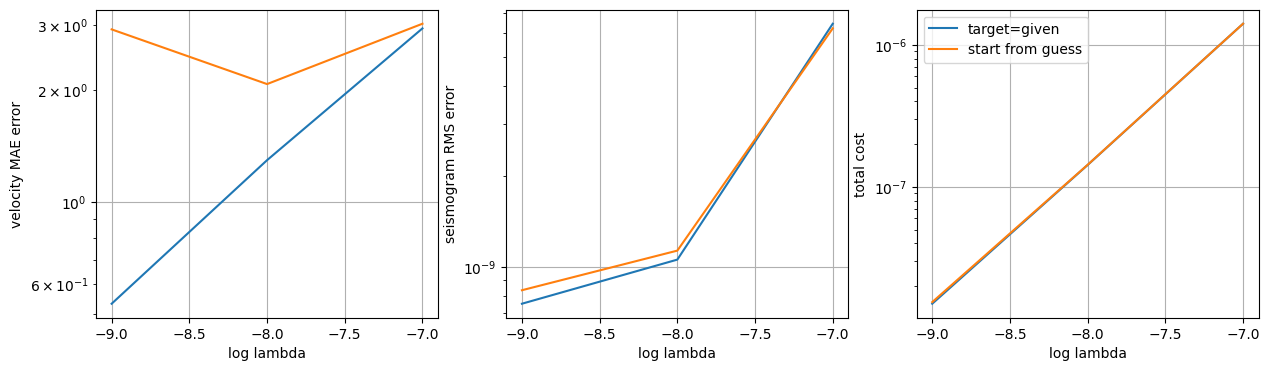

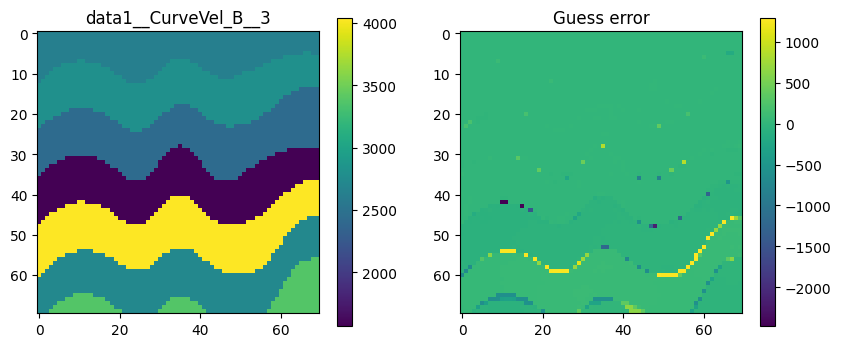

diag 2.6943617455292793e-05
diag 2.6943617455292793e-05


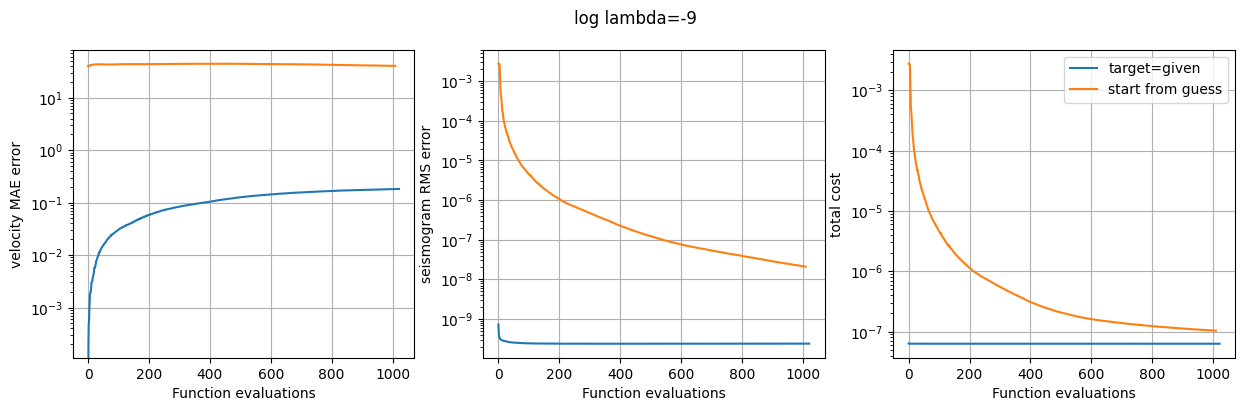

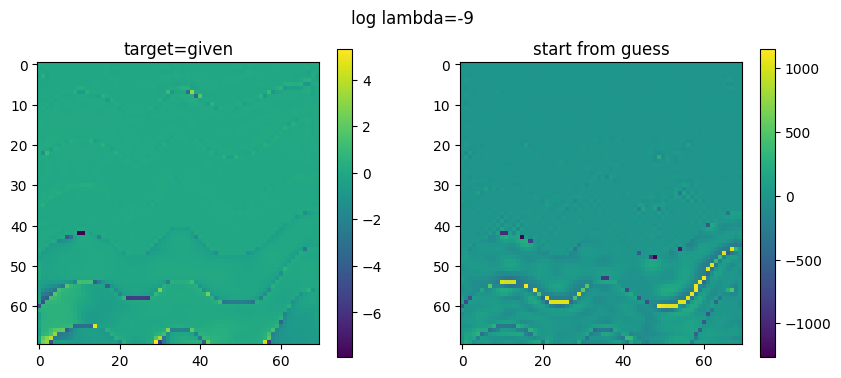

diag 2.6943617455292793e-05
diag 2.6943617455292793e-05


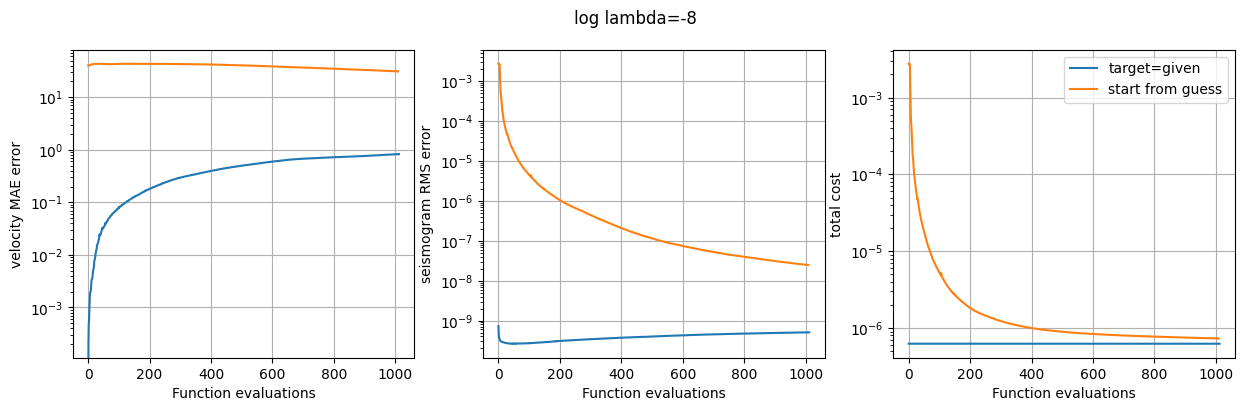

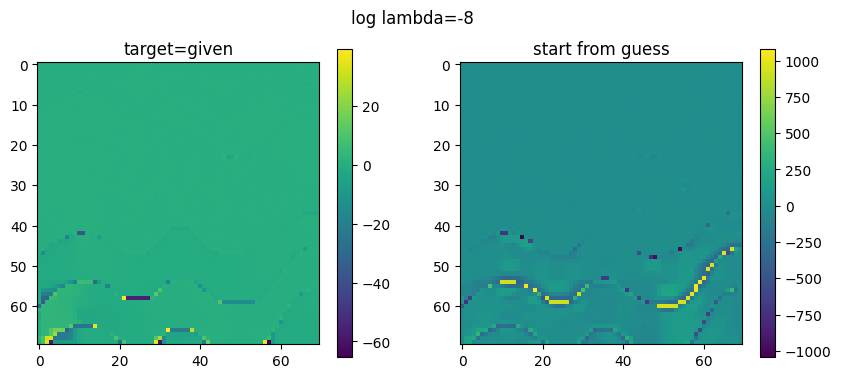

diag 2.6943617455292793e-05
diag 2.6943617455292793e-05


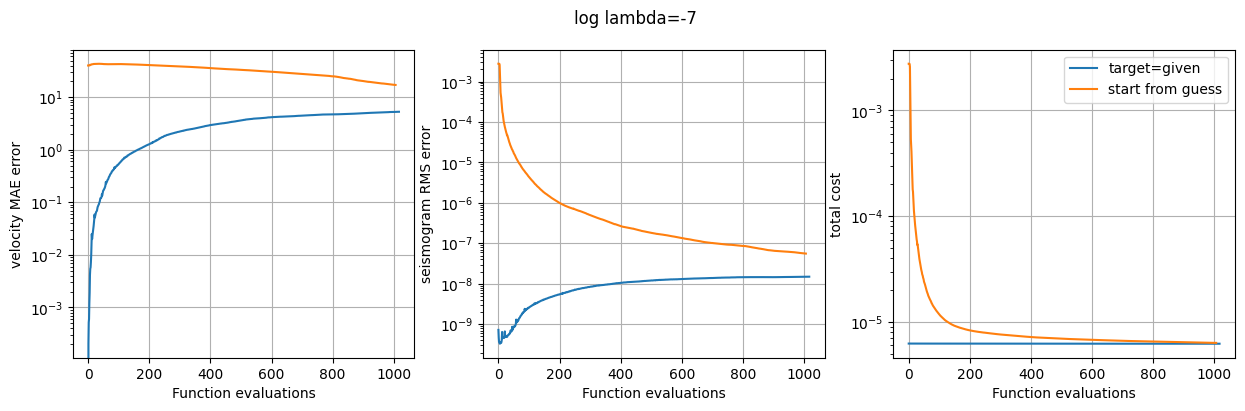

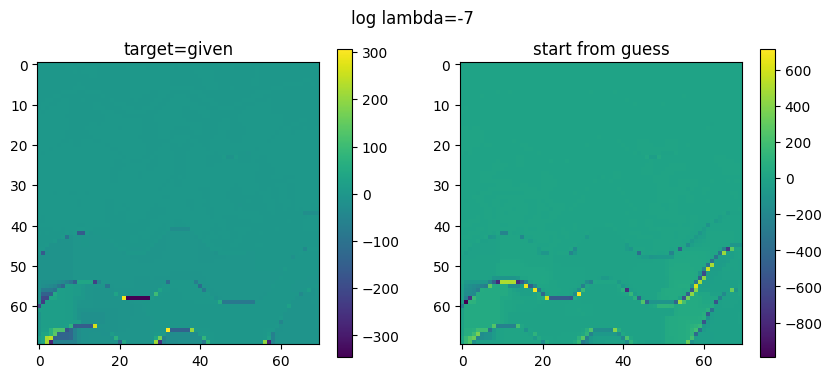

100%|██████████| 1/1 [00:00<00:00,  9.54it/s]


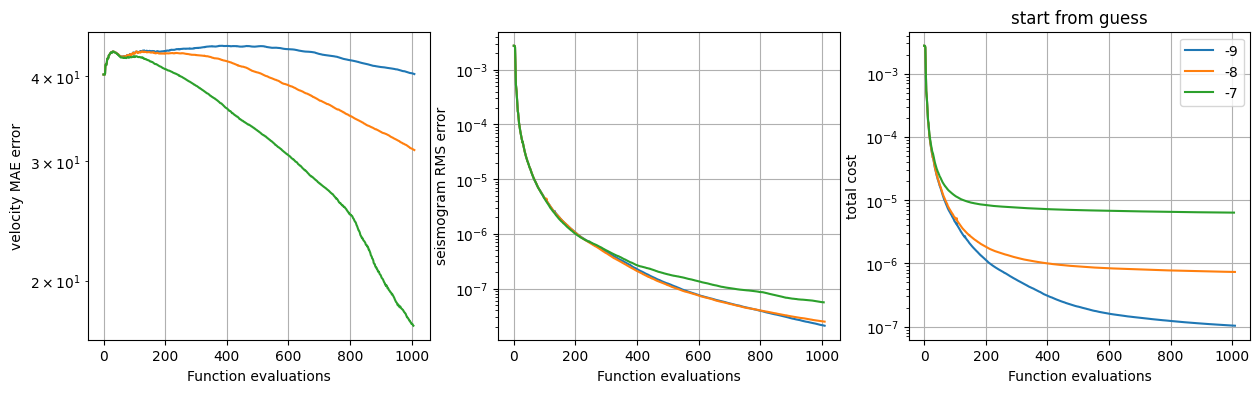

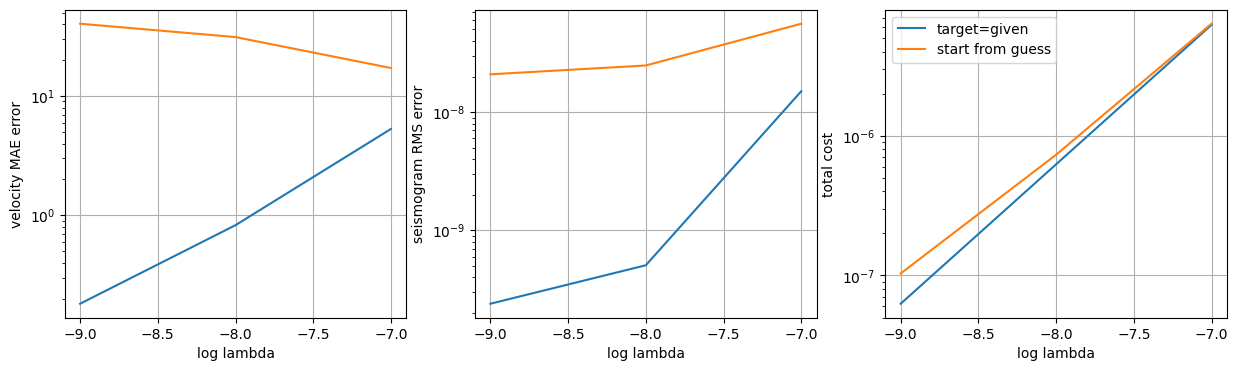

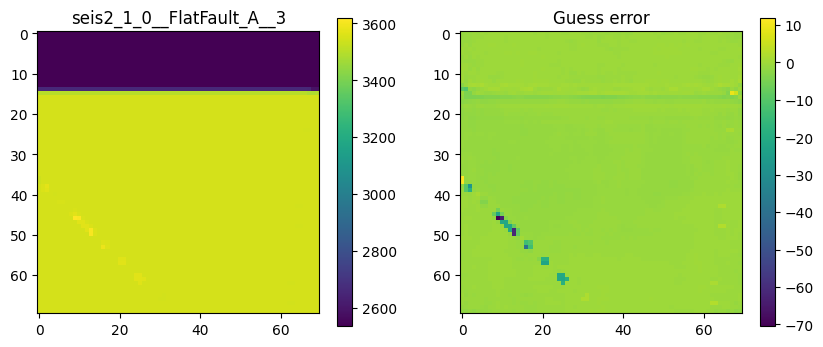

diag 4.787068096987748e-05
diag 4.787068096987748e-05


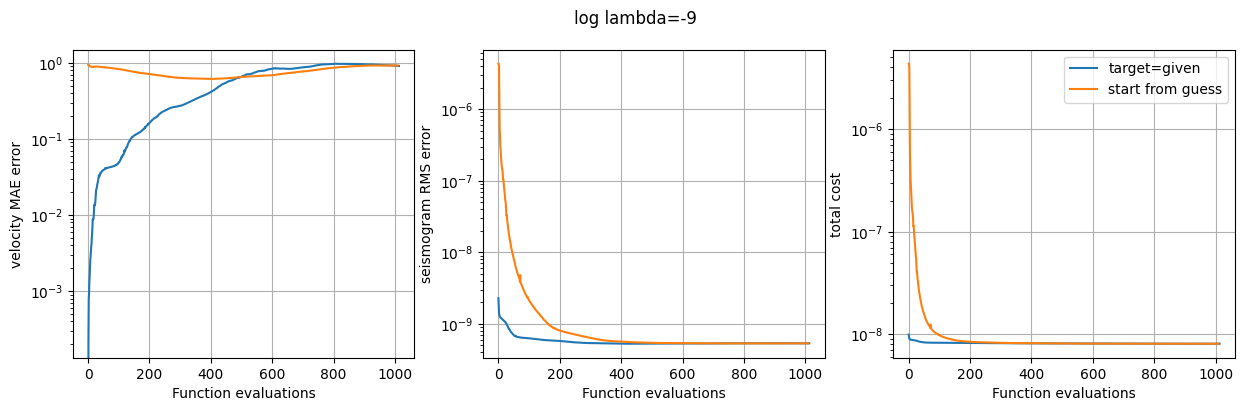

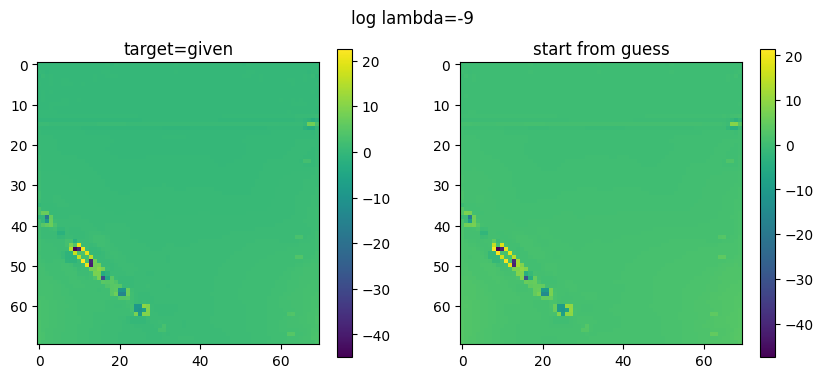

diag 4.787068096987748e-05
diag 4.787068096987748e-05


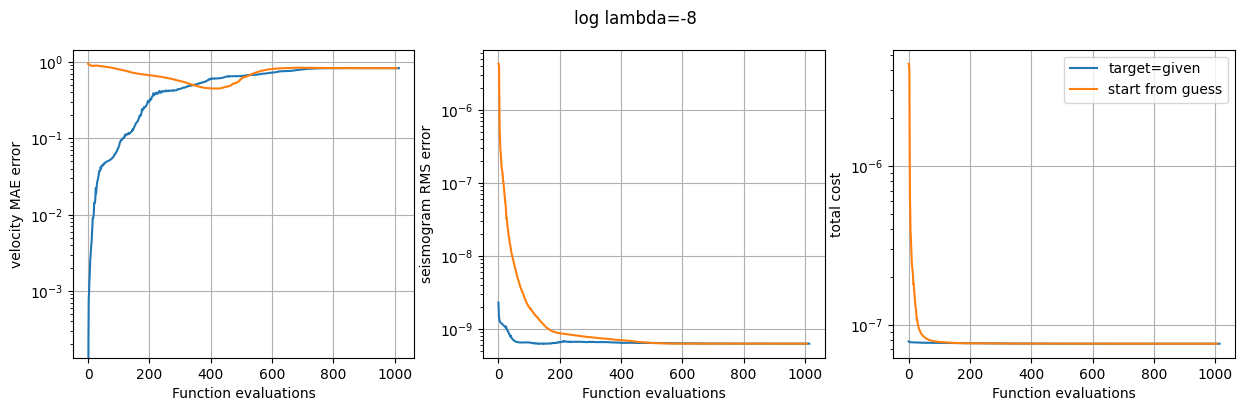

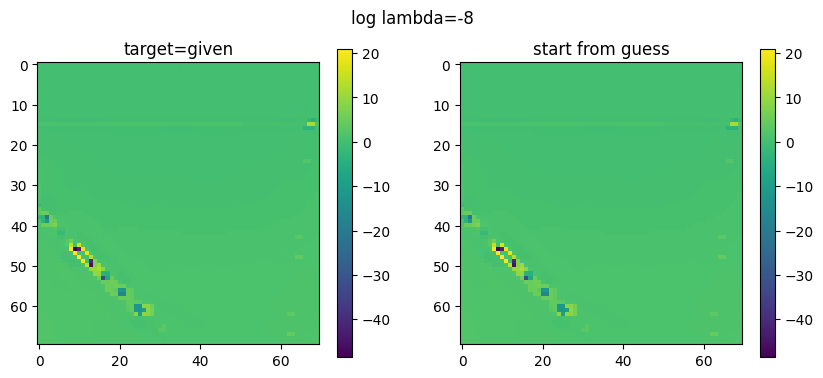

diag 4.787068096987748e-05
diag 4.787068096987748e-05


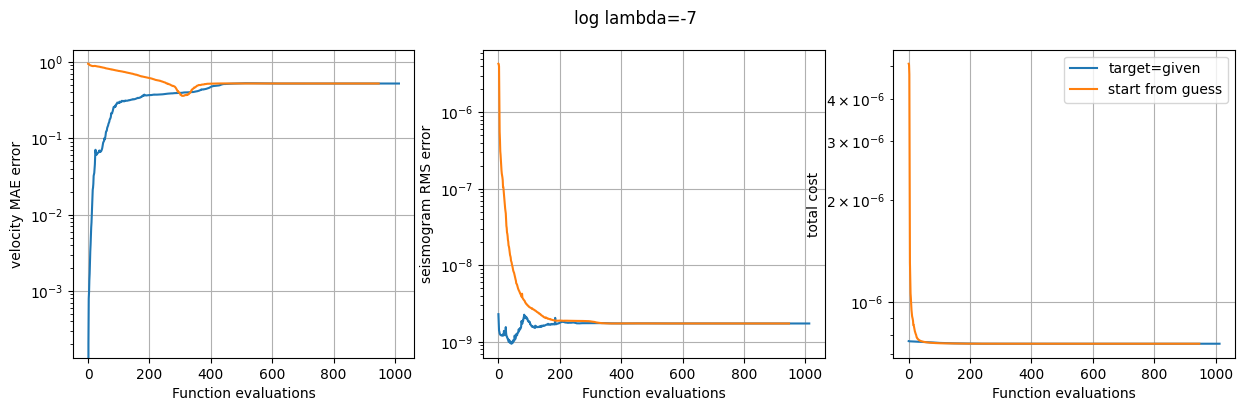

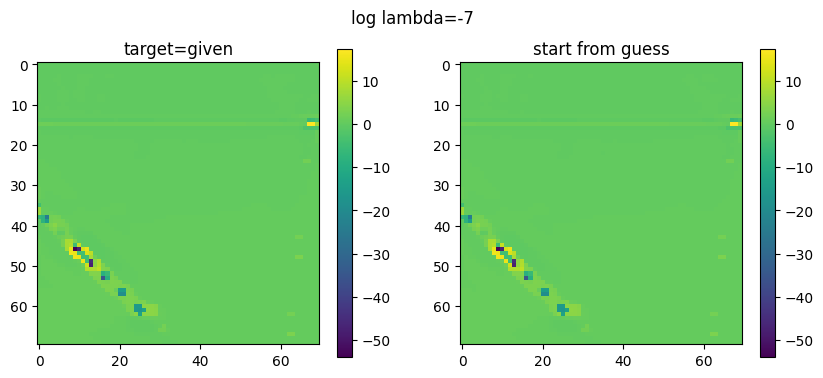

100%|██████████| 1/1 [00:00<00:00,  9.85it/s]


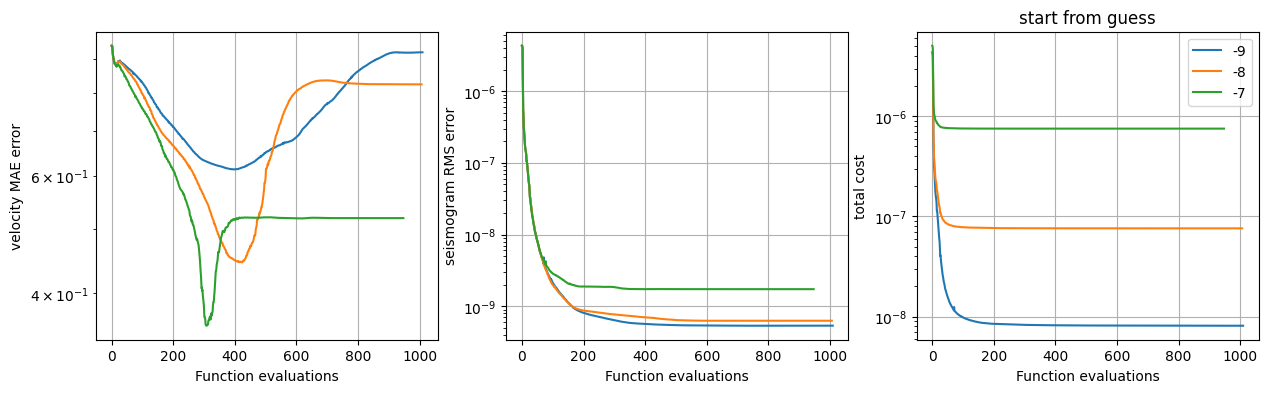

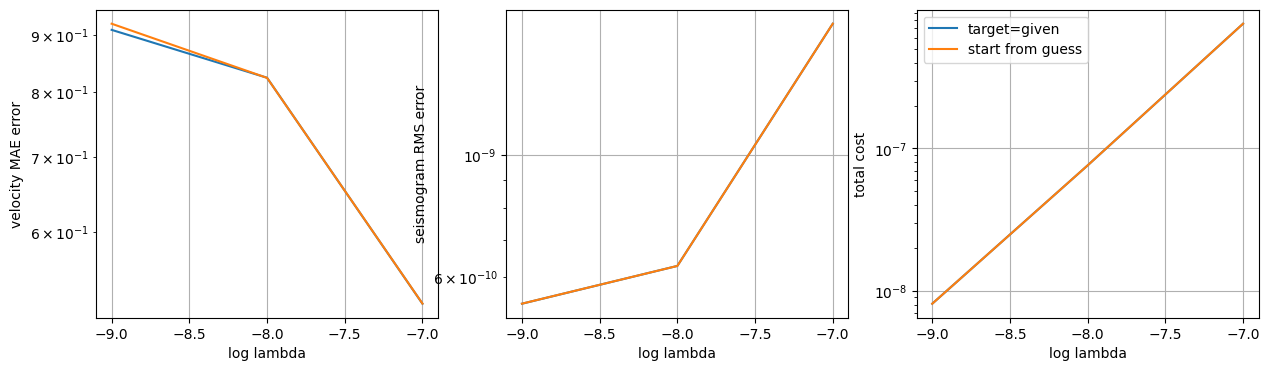

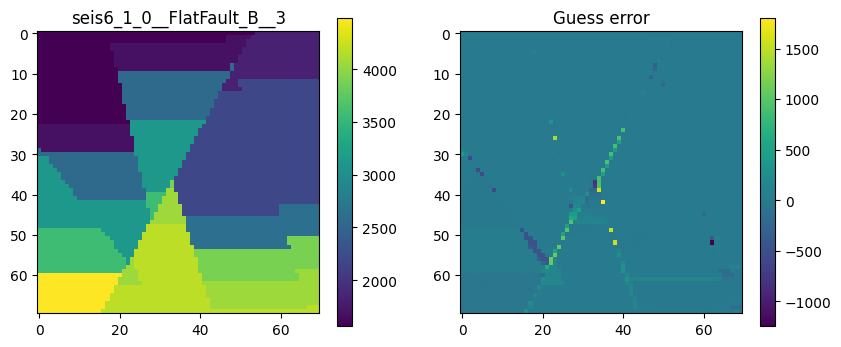

diag 3.599643172332139e-05
diag 3.599643172332139e-05


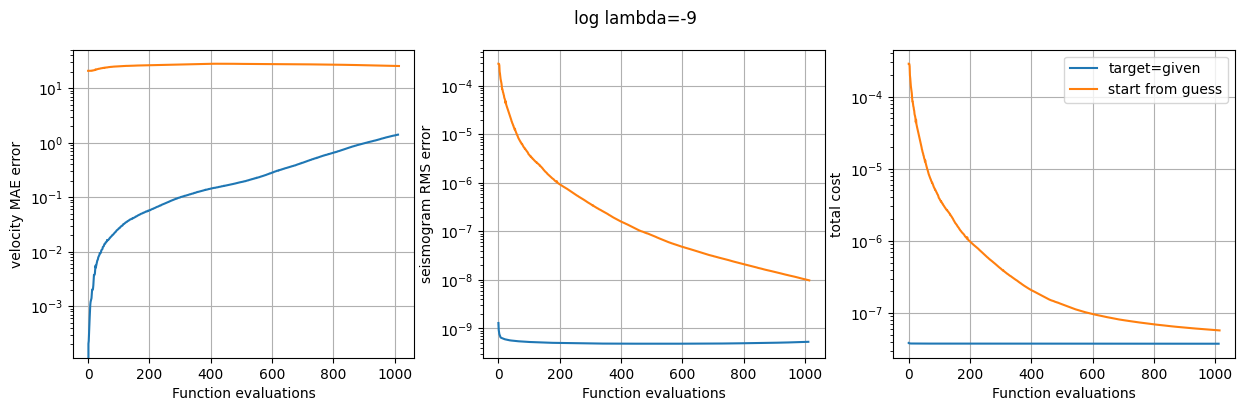

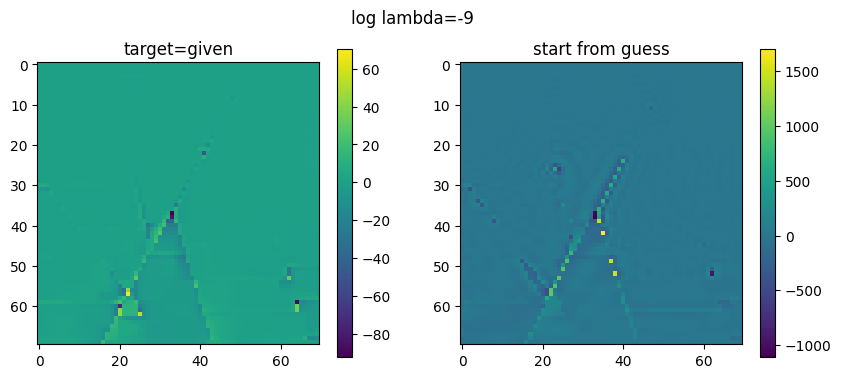

diag 3.599643172332139e-05
diag 3.599643172332139e-05


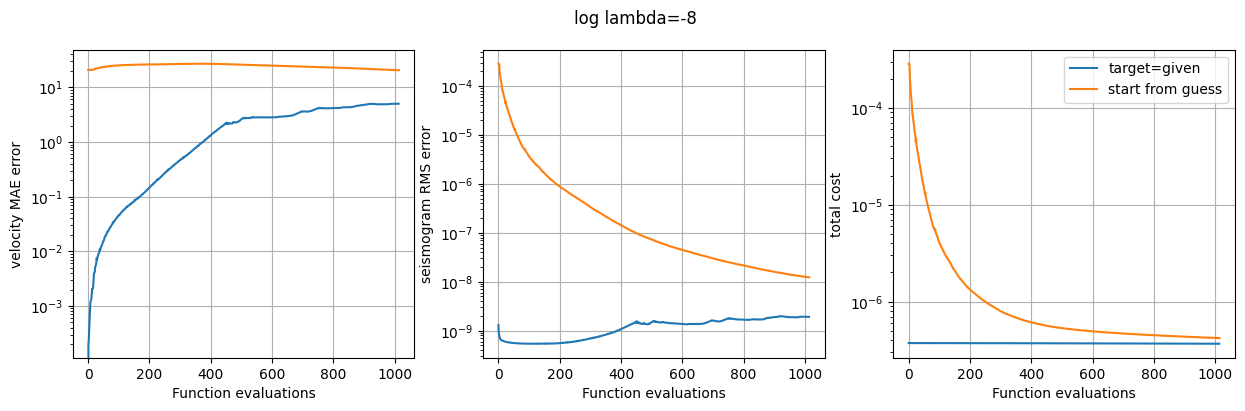

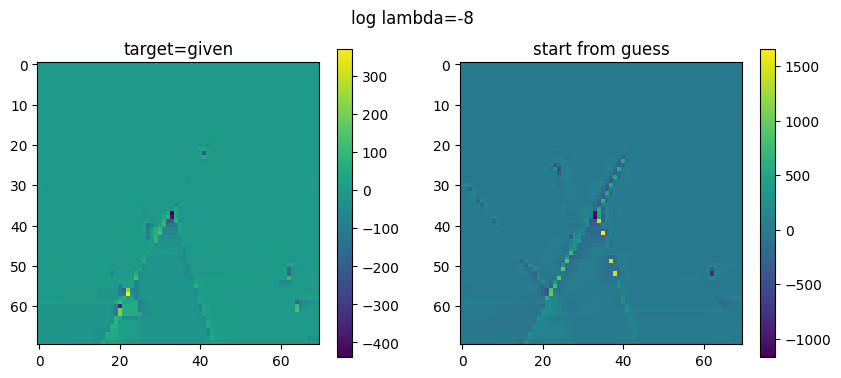

diag 3.599643172332139e-05
diag 3.599643172332139e-05


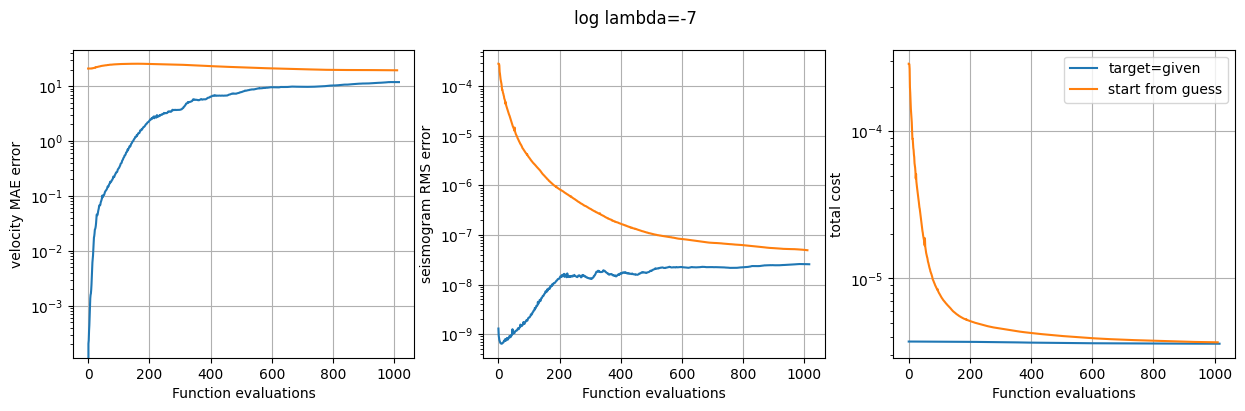

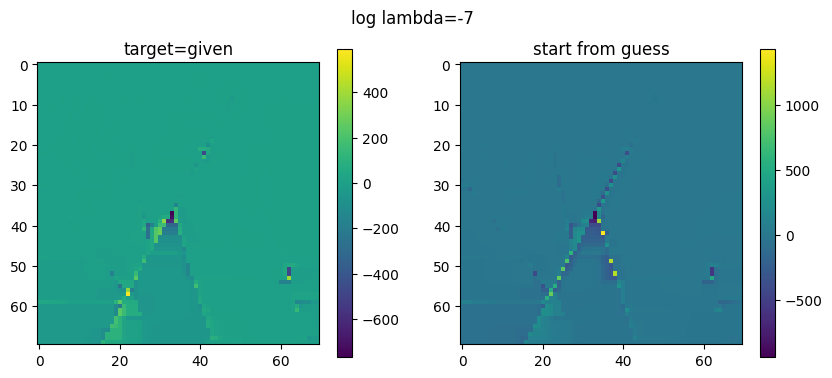

100%|██████████| 1/1 [00:00<00:00, 10.26it/s]


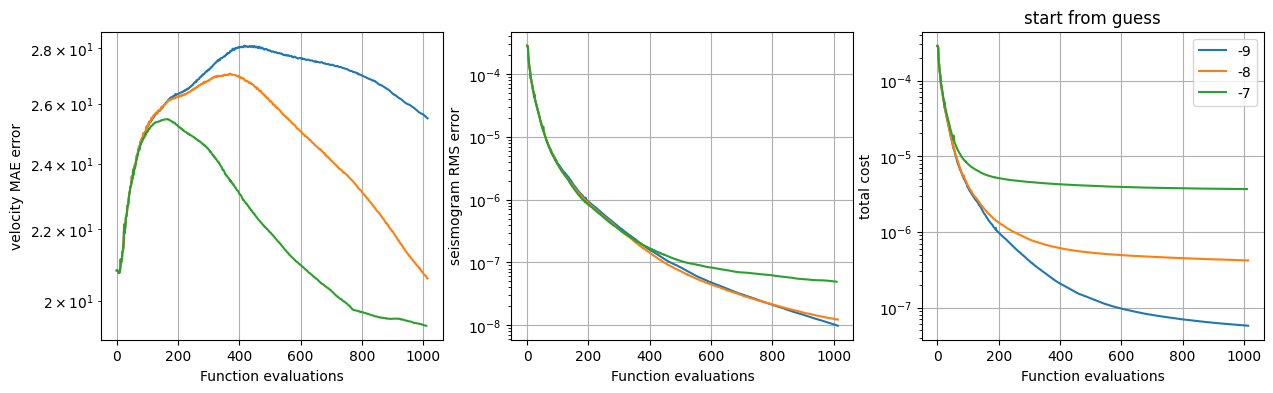

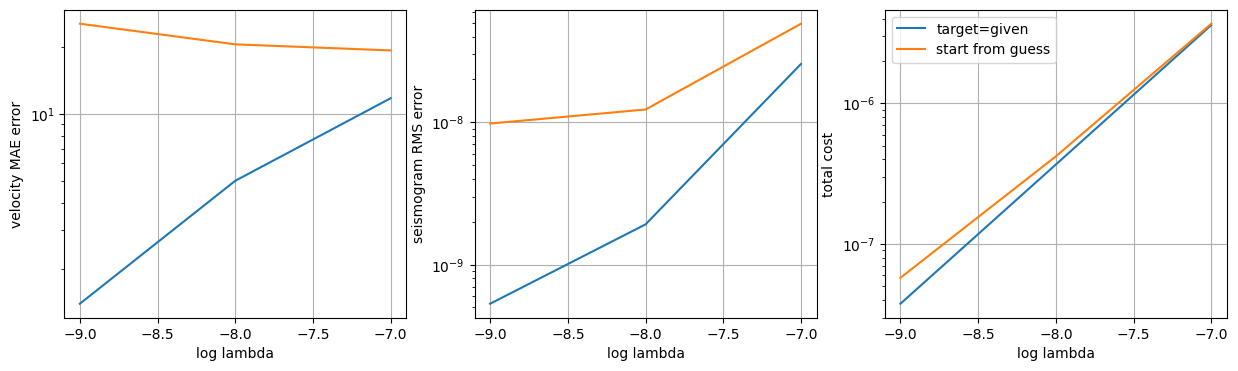

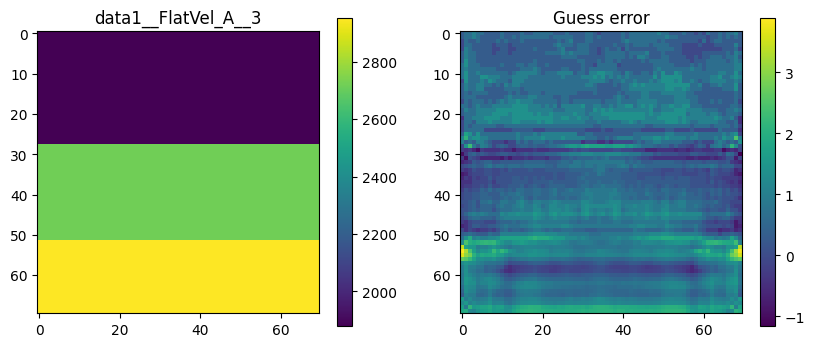

diag 3.9990738696792444e-05
diag 3.9990738696792444e-05


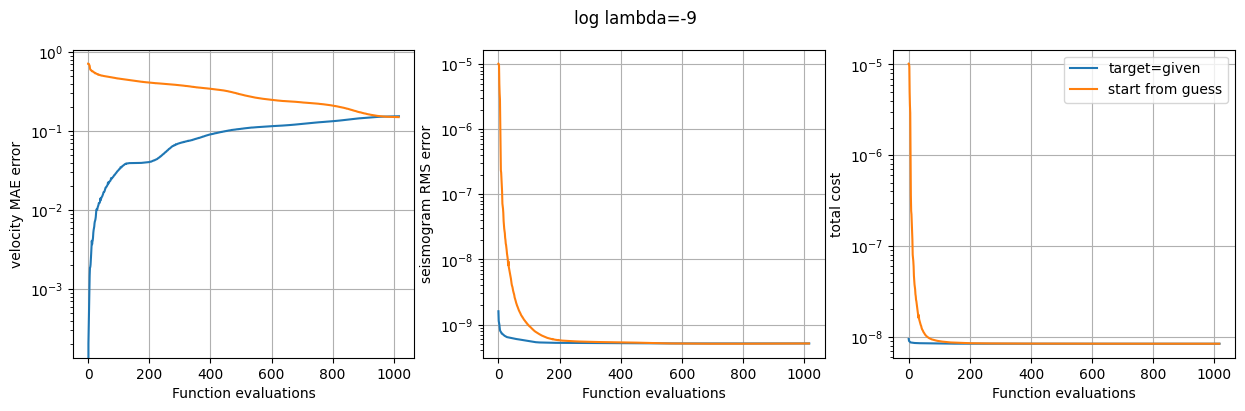

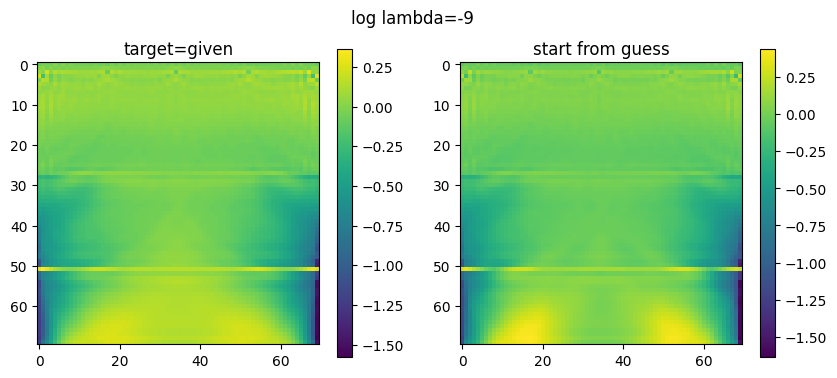

diag 3.9990738696792444e-05
diag 3.9990738696792444e-05


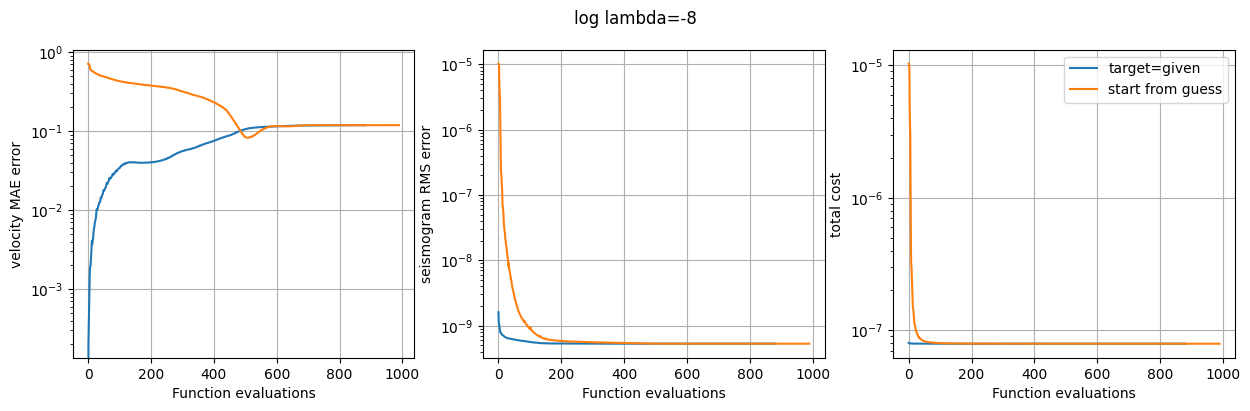

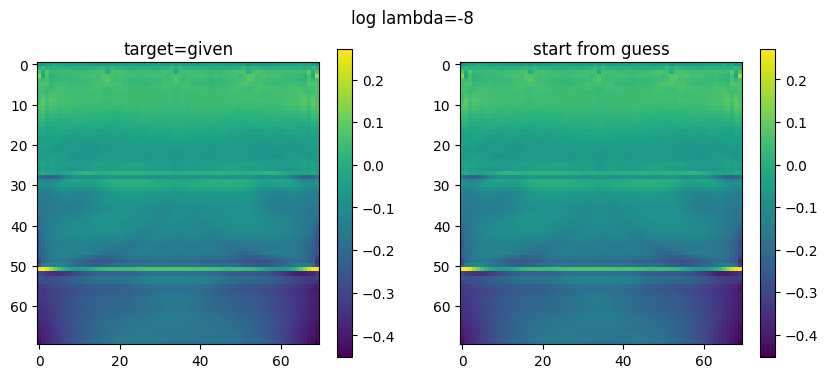

diag 3.9990738696792444e-05
diag 3.9990738696792444e-05


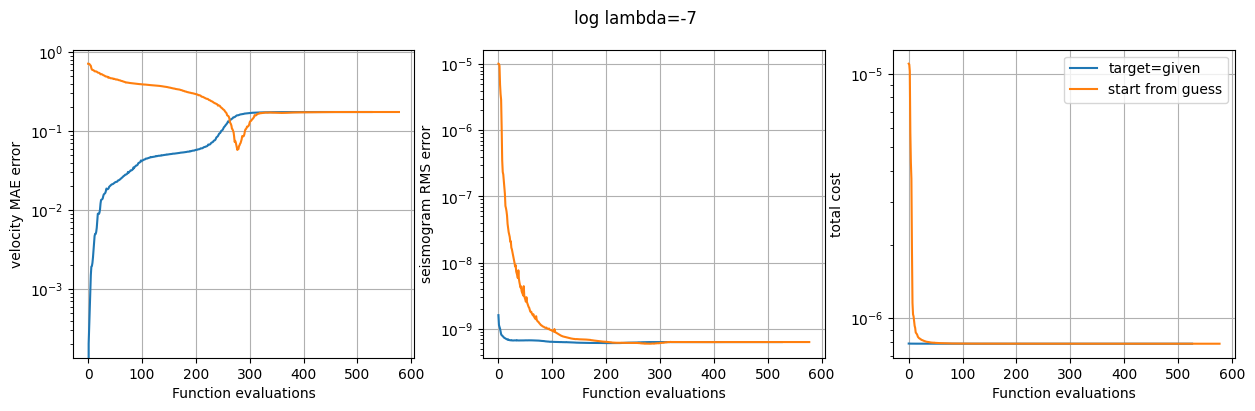

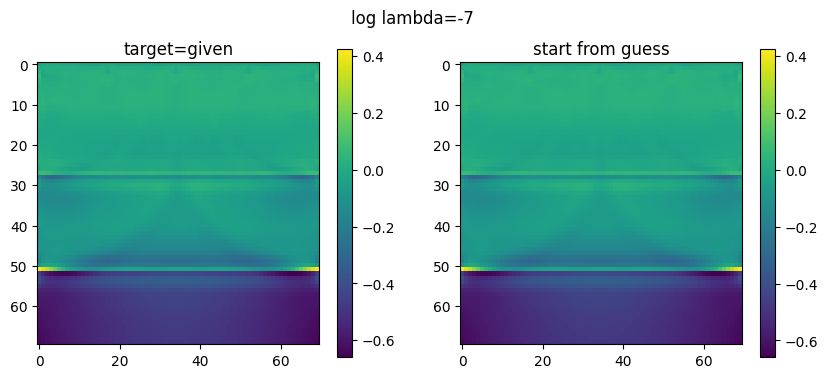

100%|██████████| 1/1 [00:00<00:00,  9.05it/s]


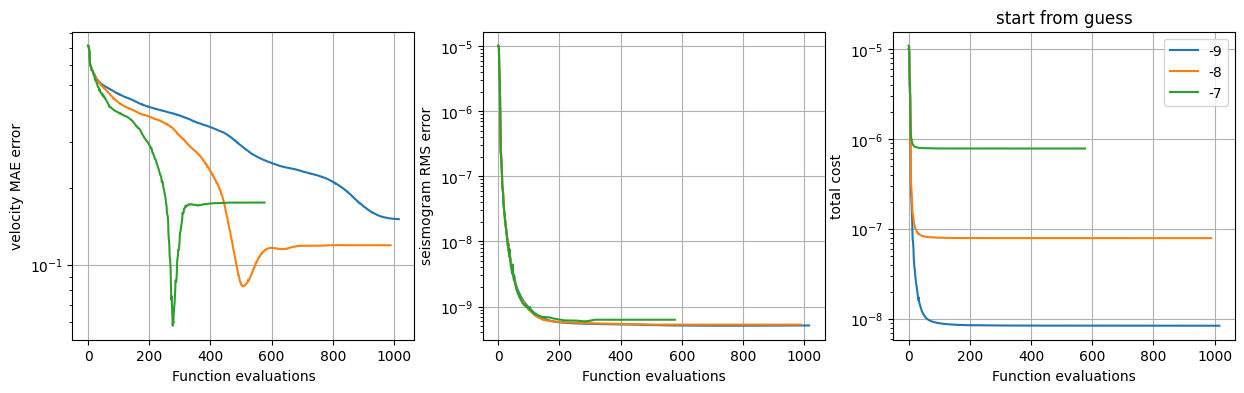

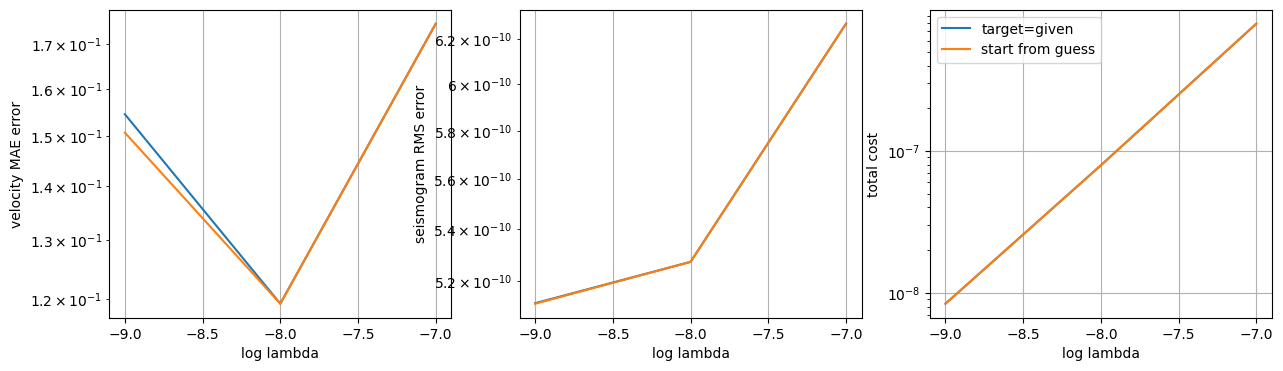

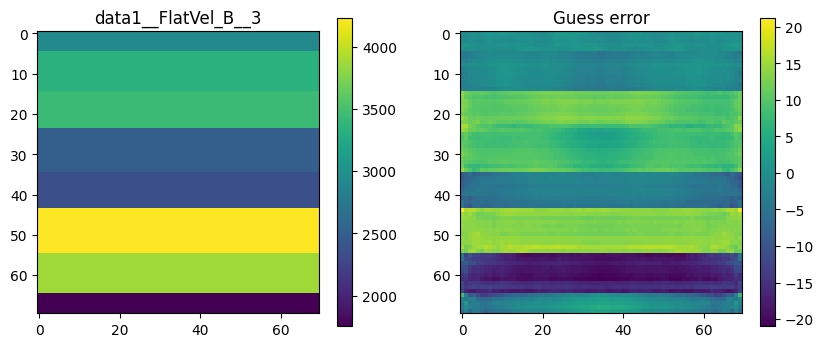

diag 2.9609671122135713e-05
diag 2.9609671122135713e-05


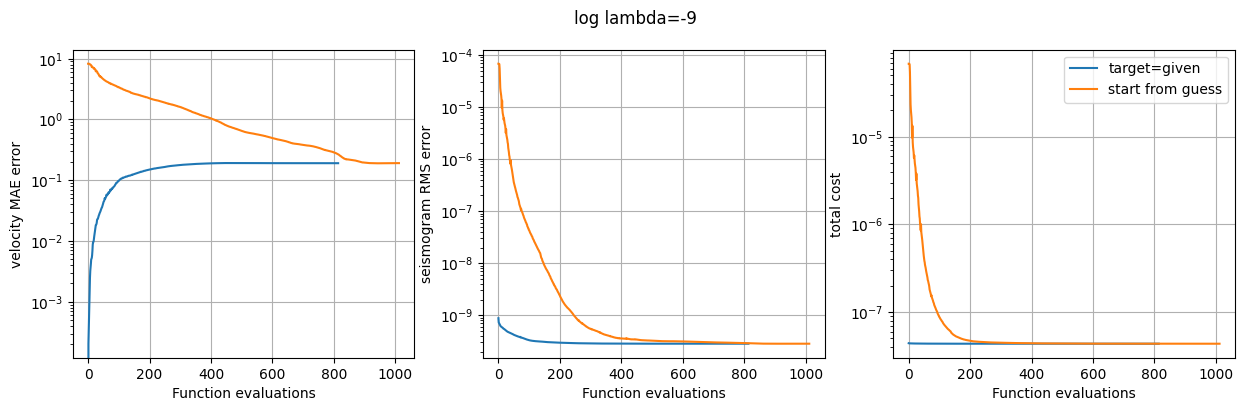

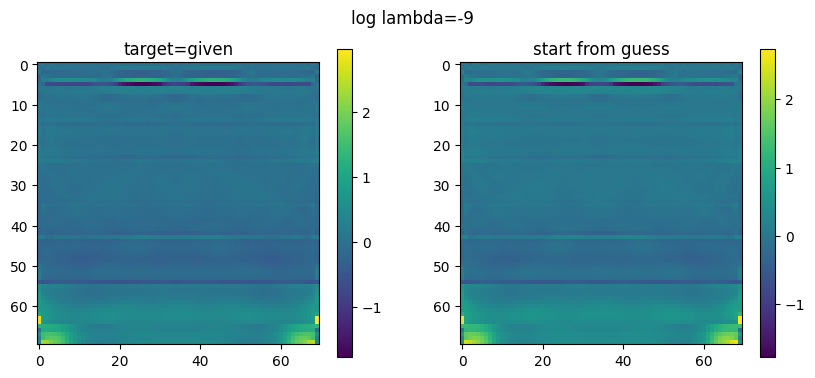

diag 2.9609671122135713e-05
diag 2.9609671122135713e-05


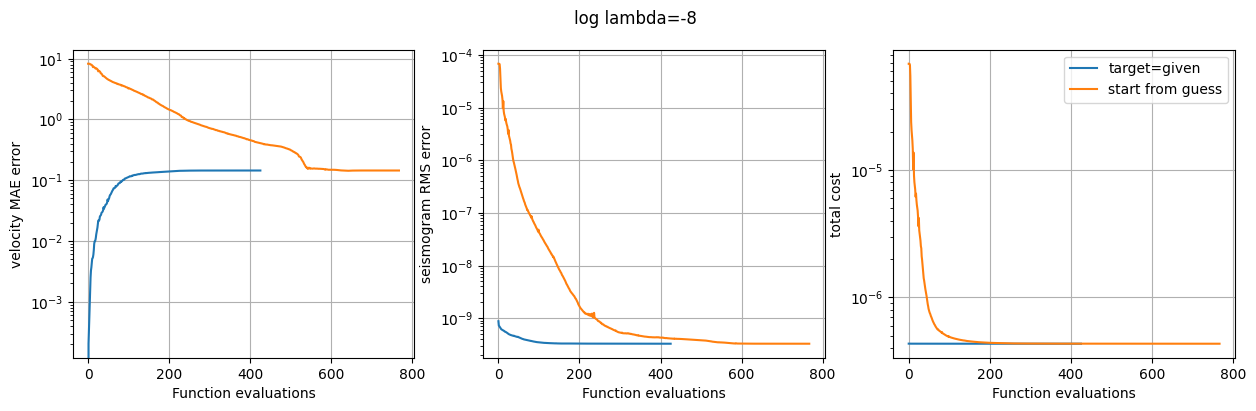

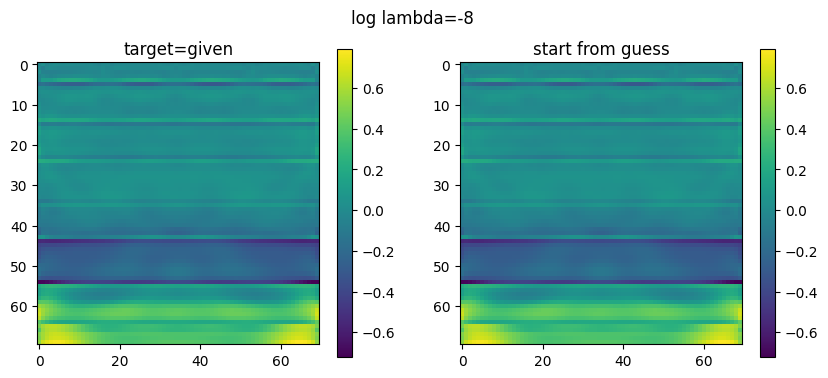

diag 2.9609671122135713e-05
diag 2.9609671122135713e-05


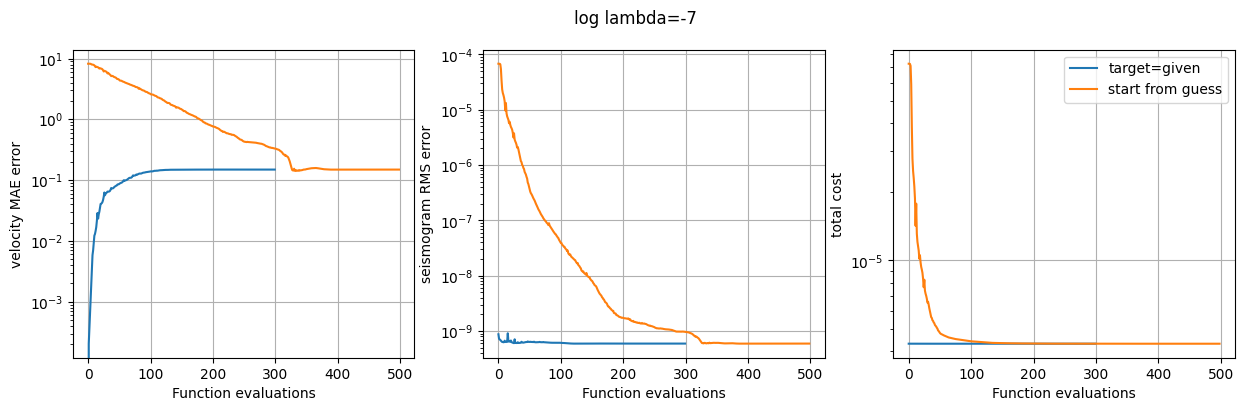

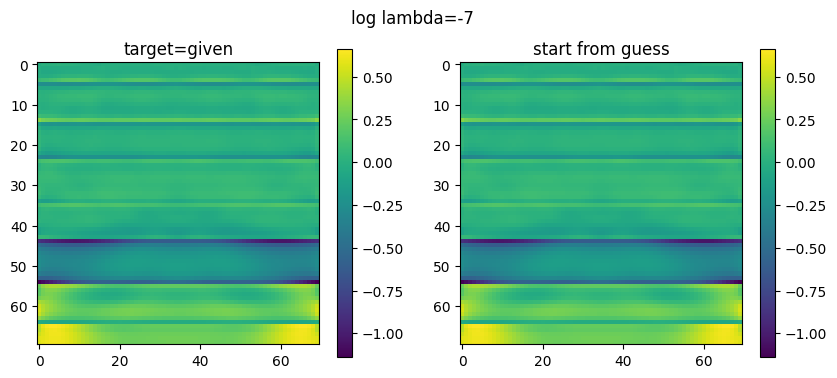

100%|██████████| 1/1 [00:00<00:00, 10.09it/s]


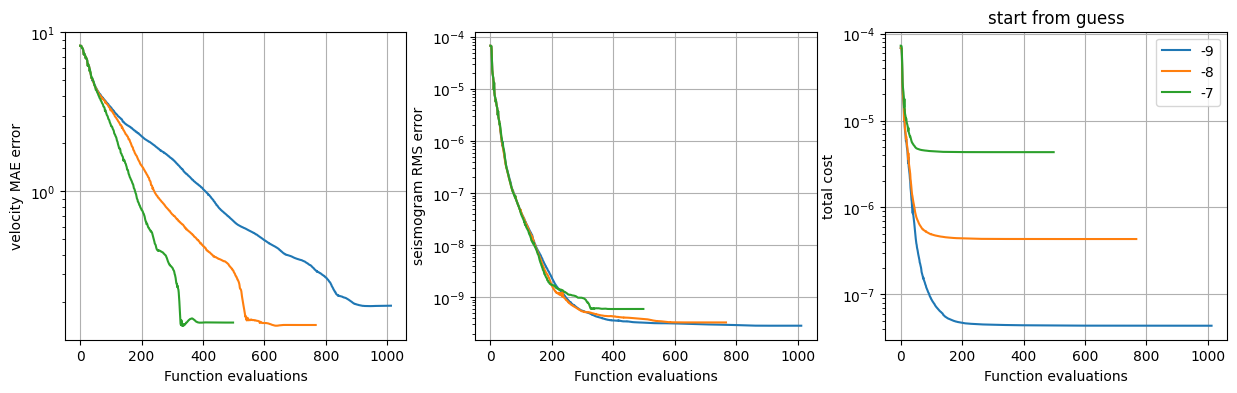

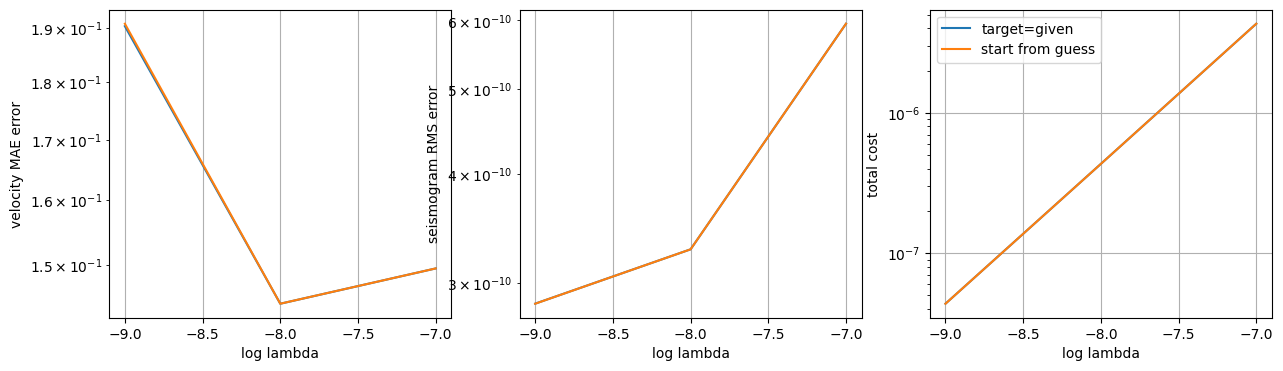

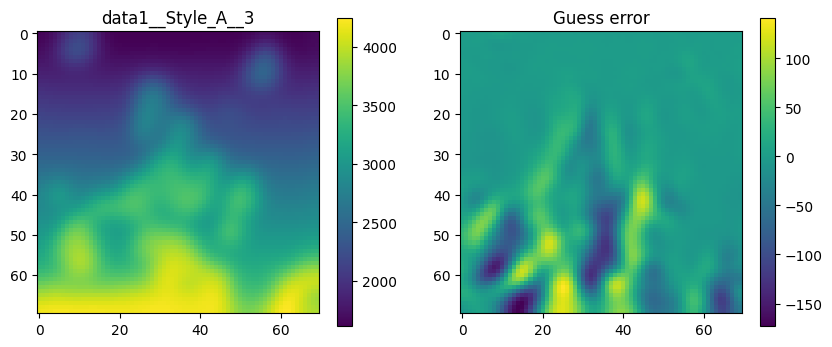

diag 1.4526489636060681e-05
diag 1.4526489636060681e-05


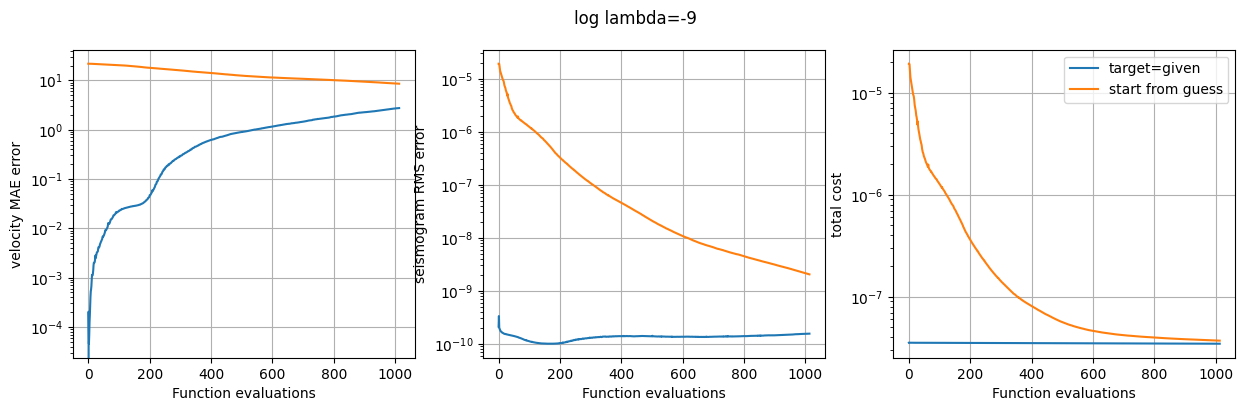

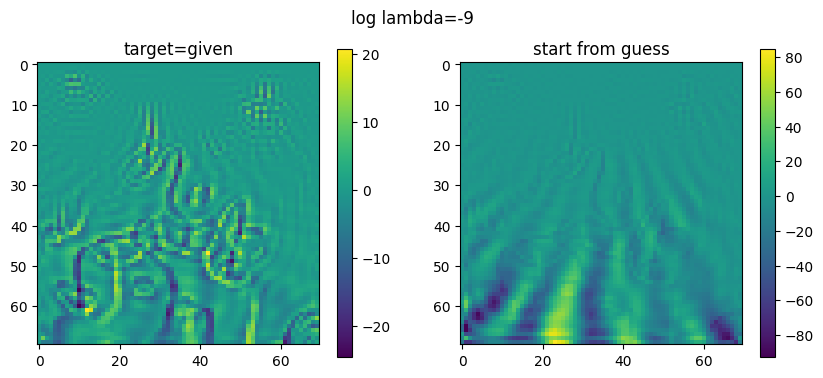

diag 1.4526489636060681e-05
diag 1.4526489636060681e-05


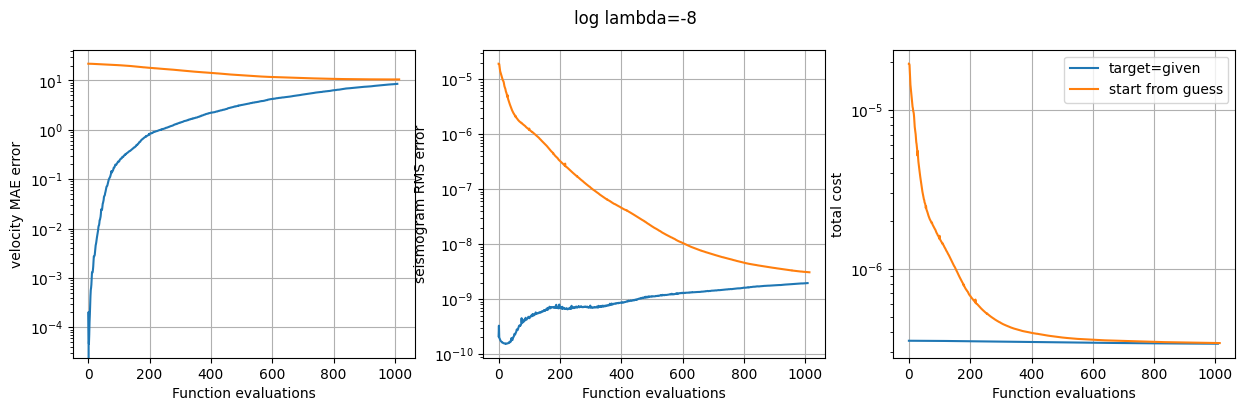

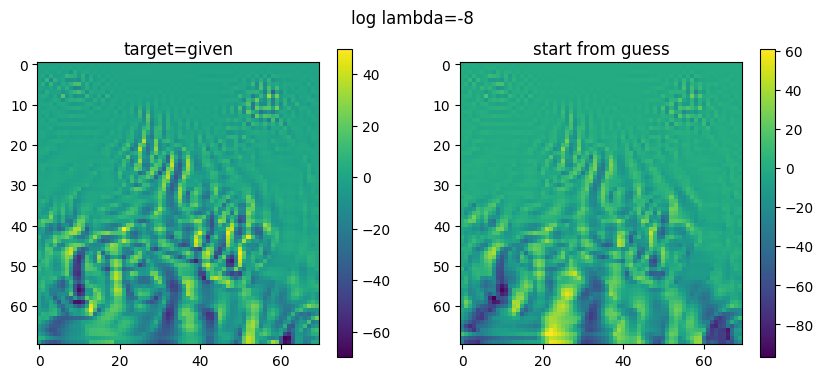

diag 1.4526489636060681e-05
diag 1.4526489636060681e-05


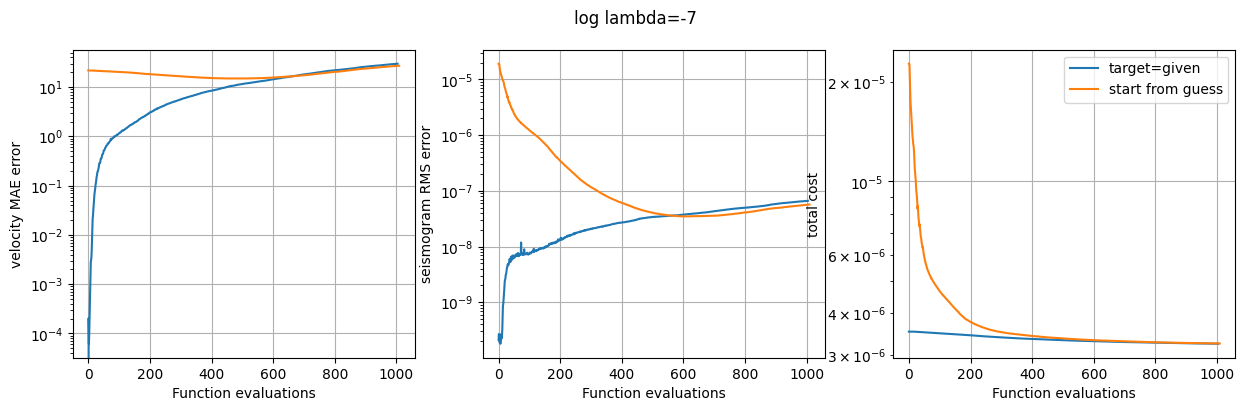

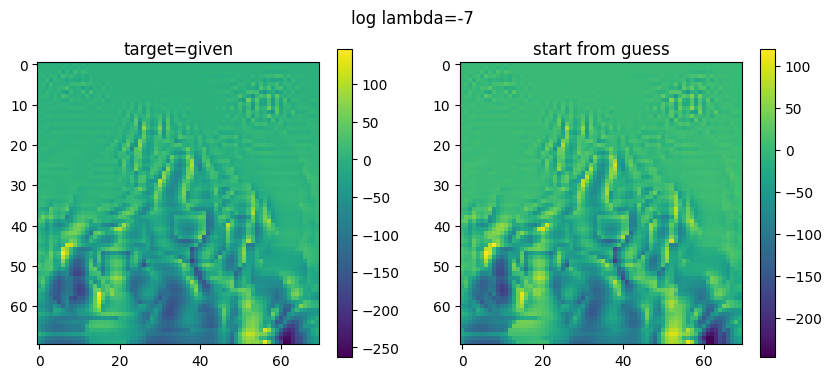

100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


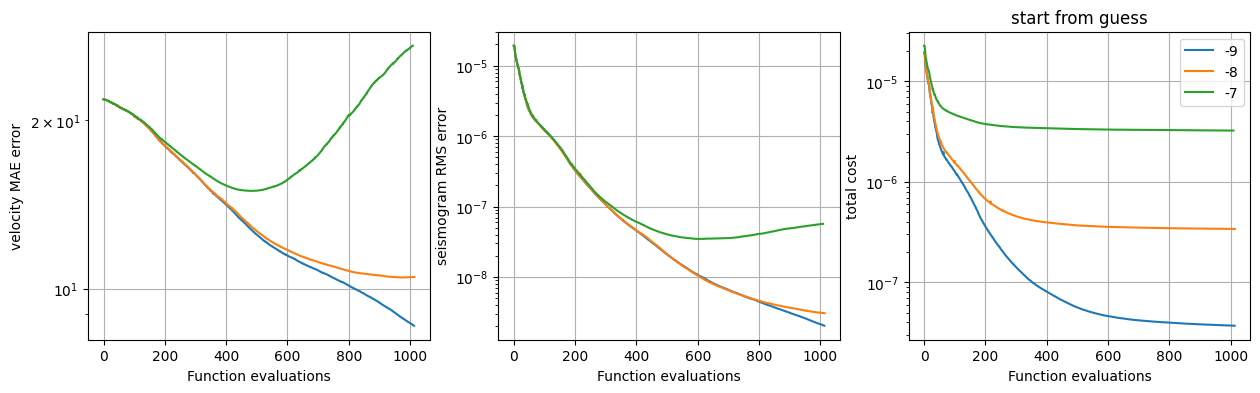

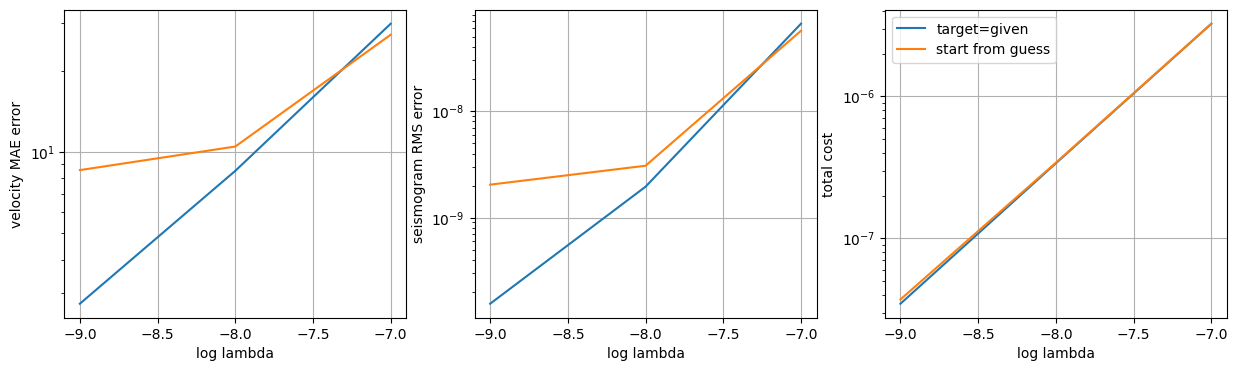

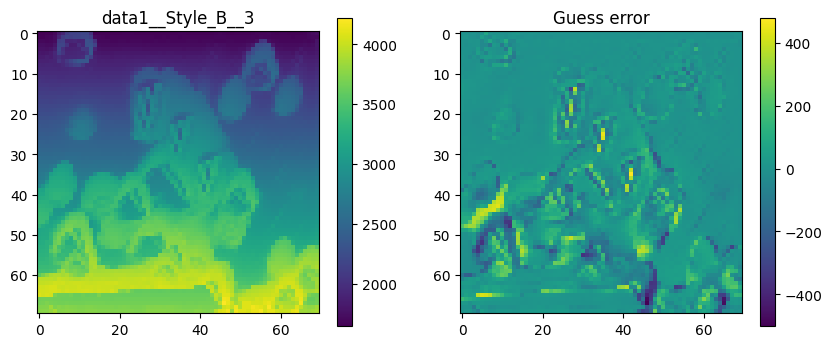

diag 1.365213059380767e-05
diag 1.365213059380767e-05


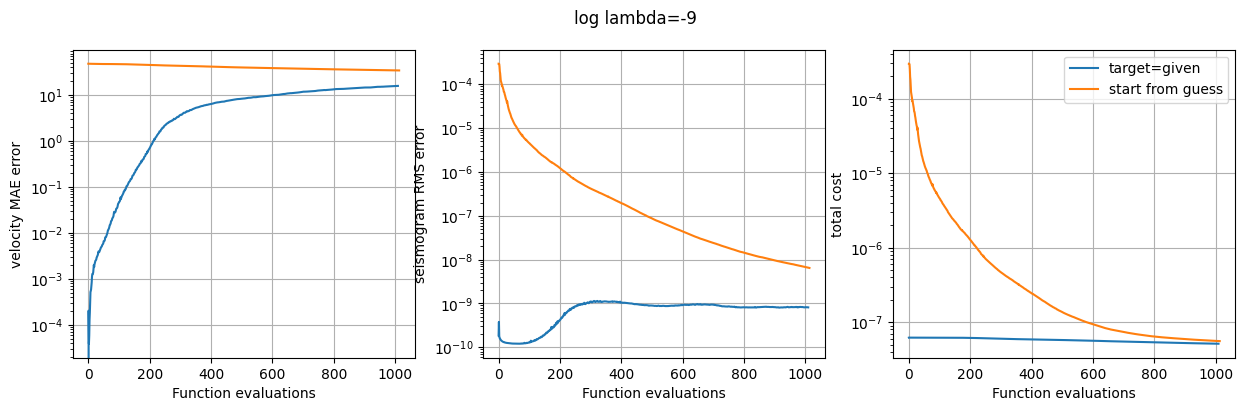

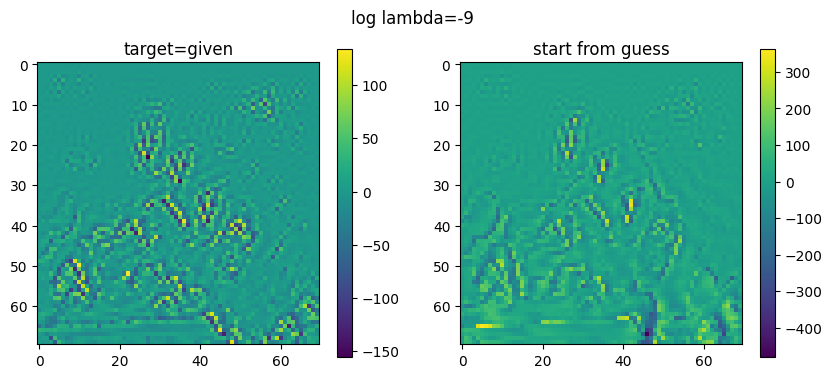

diag 1.365213059380767e-05
diag 1.365213059380767e-05


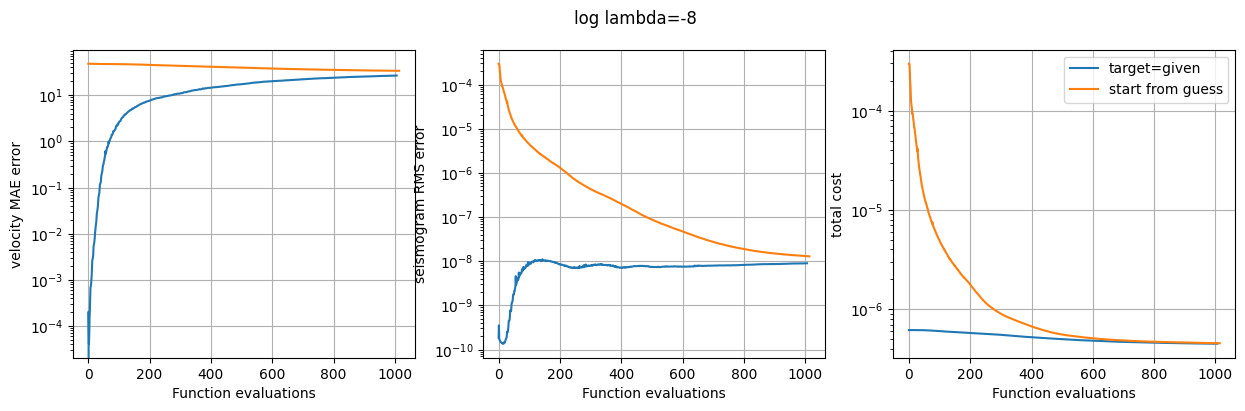

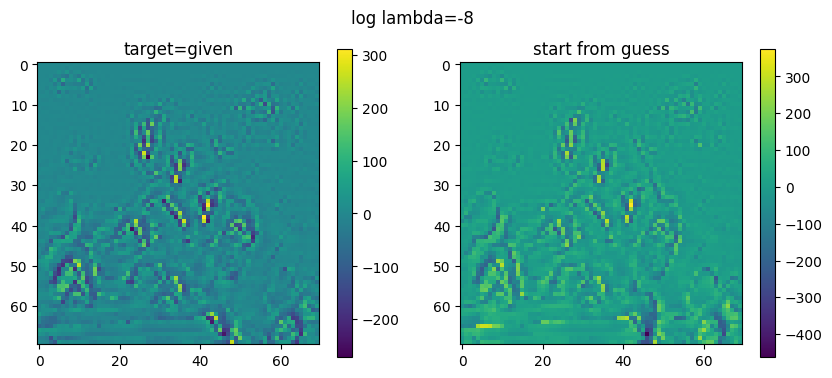

diag 1.365213059380767e-05
diag 1.365213059380767e-05


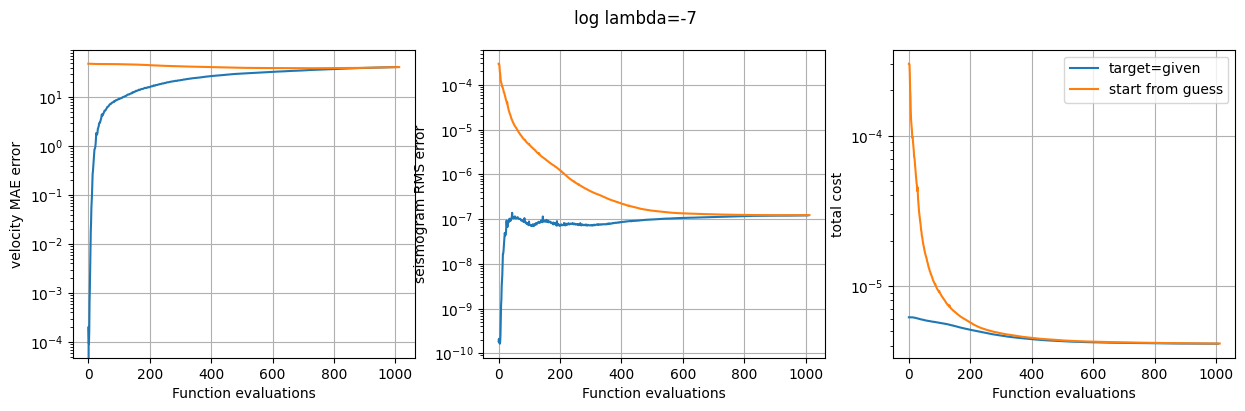

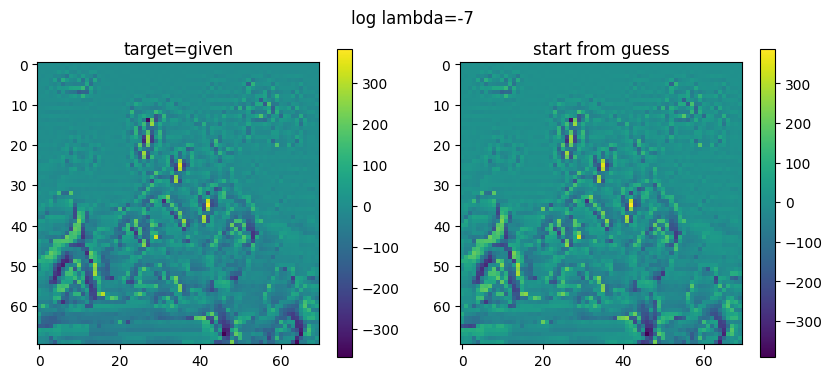

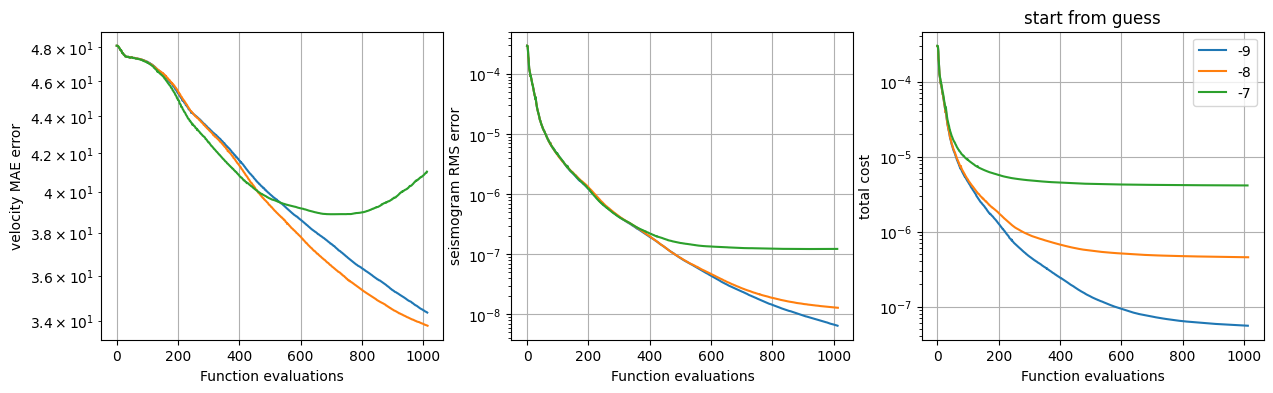

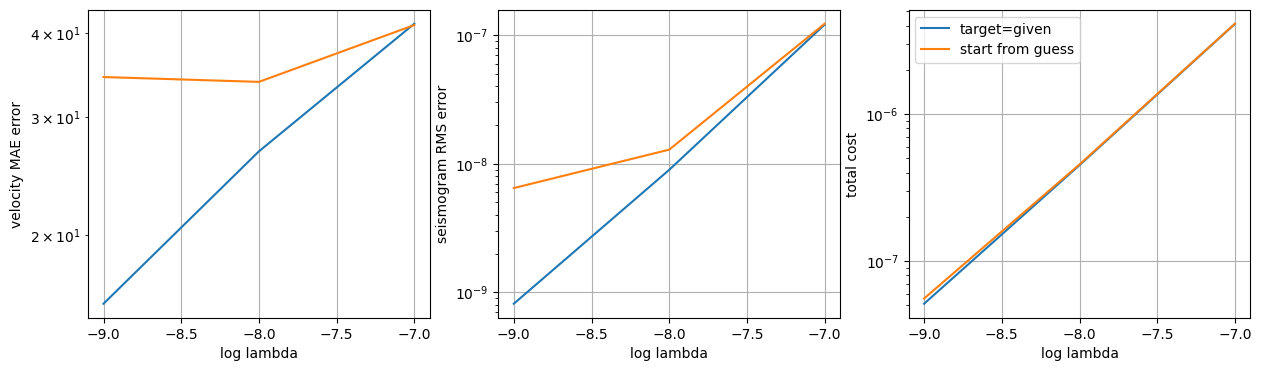

In [4]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_invert.InversionModel()
model.state = 1
model.history_size = 10000
model.prior = seis_prior.TotalVariation()
model.prior.λ = 10**-8
model.show_convergence=True
model.iter_list = [1000]

do_which_list = [False,True,True]

def param_func(model,value):
    model.prior.λ = 10**value
    return model
    
param_values = [-9,-8, -7]
param_name = "log lambda"


for d in data[3::1000]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.)